# now do some ML using the web scraped data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from player_data_expansion import get_all_expanded_player_fight_data

In [76]:
# AWS integration getting file data
df_init = pd.read_csv("fight_data.csv").fillna(pd.NA)

In [77]:
df_init.head()

,Date,fighter1,fighter1_result,method_or_round,fighter2,Venue,Undercard fights,link,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,"Wednesday, 14 May 2025",Sam Goodman,Winner,"UD, Round 10",Cesar Vaca Espinoza,"Hordern Pavilion, Sydney, New South Wales, Aus...",<NA>,https://box.live/fights/goodman-vs-espinoza/,19,0,0,19,1,1,169,NaN,0,0,2018,2018
1,"Sunday, 11 May 2025",Fernando Martinez,Winner,"W, Round",Kazuto Ioka,"Ota-City General Gymnasium, Tokyo, Japan",Hayato Tsutsumi Beat Jaime Arboleda (TKO 3),https://box.live/fights/martinez-vs-ioka-ii/,17,0,0,31,1,3,161,165.0,0,0,2017,2009
2,"Saturday, 10 May 2025",Anthony Cacace,Winner,"TKO, Round 9",Leigh Wood,"Motorpoint Arena, Nottingham, United Kingdom",Ezra Taylor Beat Troy Jones (UD 10) \nLiam Da...,https://box.live/fights/cacace-vs-wood/,23,0,1,28,0,3,178,170.0,35,61,2012,2011
3,"Saturday, 10 May 2025",Erickson Lubin,Winner,"TKO, Round 11",Ardreal Holmes,"Silver Spurs Arena, Kissimmee, FL, United States",Mayeli Flores Beat Nazarena Romero (SD 10),https://box.live/fights/lubin-vs-holmes/,26,0,2,17,0,0,180,188.0,69,35,2013,2016
4,"Saturday, 10 May 2025",Emanuel Navarrete,Winner,"TD, Round 8",Charly Suarez,"Pechanga Arena, San Diego, CA, United States",Raymond Muratalla Beat Zaur Abdullaev (UD 12)...,https://box.live/fights/navarrete-vs-suarez/,39,1,2,18,0,0,170,168.0,82,56,2012,2019


In [78]:
df_init.tail(10)

,Date,fighter1,fighter1_result,method_or_round,fighter2,Venue,Undercard fights,link,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
23,"Thursday, 1 May 2025",Kevin Lerena,Winner,"TKO, Round 3",Serhiy Radchenko,"Sunbet Arena, Pretoria, South Africa",<NA>,https://box.live/fights/lerena-vs-radchenko/,30,0,3,11,0,7,185,186.0,47,45,2011,2014
24,"Sunday, 27 April 2025",Marlon Tapales,Winner,"RTD, Round 3",Jon Jon Jet,"General Santos City, Cotabato del Sur, Philipp...",<NA>,https://box.live/fights/tapales-vs-jet/,39,0,4,15,1,1,163,166.0,0,0,2008,2015
25,"Saturday, 26 April 2025",Chris Eubank Jr,Winner,"UD, Round 12",Conor Benn,"Tottenham Hotspur Stadium, London, United Kingdom",Anthony Yarde Beat Lyndon Arthur (UD 12) \nAa...,https://box.live/fights/eubank-jr-vs-benn/,34,0,3,23,0,0,180,173.0,74,61,2011,2016
26,"Sunday, 20 April 2025",Ben Whittaker,Winner,"TKO, Round 2",Liam Cameron,"Resorts World Arena, Birmingham, United Kingdom",Sam Eggington Beat Lee Cutler (TD 9) \nFrazer...,https://box.live/fights/whittaker-vs-cameron-ii/,8,1,0,23,1,6,191,183.0,63,43,2022,2009
27,"Saturday, 19 April 2025",Dalton Smith,Winner,"UD, Round 12",Mathieu Germain,"Park Community Arena, Sheffield, United Kingdom",Caoimhin Agyarko Beat Ryan Kelly (MD 10) \nJo...,https://box.live/fights/smith-vs-germain/,17,0,0,26,1,2,176,NaN,0,0,2019,2015
28,"Saturday, 19 April 2025",Gabriela Fundora,Winner,"TKO, Round 7",Marilyn Badillo Amaya,"Frontwave Arena, Oceanside, CA, United States",Jorge Perez Beat Charles Conwell (SD 12) \nOl...,https://box.live/fights/fundora-vs-amaya/,15,0,0,19,1,0,175,160.0,0,0,2021,2017
29,"Saturday, 19 April 2025",Sadriddin Akhmedov,Draw,"MD, Round 10",Elias Espadas,"Commerce Casino, Commerce, CA, United States",<NA>,https://box.live/fights/akhmedov-vs-espadas/,15,0,0,23,0,6,175,178.0,0,0,2018,2012
30,"Friday, 18 April 2025",Sergey Kovalev,Winner,"KO, Round 7",Artur Mann,"Yunost Arena, Chelyabinsk, Russian Federation",<NA>,https://box.live/fights/kovalev-vs-mann/,35,1,5,22,0,4,183,185.0,83,59,2009,2015
31,"Sunday, 11 May 2025",Fernando Martinez,Winner,"UD, Round 12",Kazuto Ioka,"Ota-City General Gymnasium, Tokyo, Japan",Hayato Tsutsumi Beat Jaime Arboleda (TKO 3),https://box.live/fights/martinez-vs-ioka-ii/,17,0,0,31,1,3,161,165.0,0,0,2017,2009
32,"Saturday, 10 May 2025",Emanuel Navarrete,Winner,"TD, Round 8",Charly Suarez,"Pechanga Arena, San Diego, CA, United States",Raymond Muratalla Beat Zaur Abdullaev (UD 12)...,https://box.live/fights/navarrete-vs-suarez/,39,1,2,18,0,0,170,168.0,82,56,2012,2019


In [79]:
# ADD BASIC DATA TO SEE IF IT WORKS
df_init = pd.concat([df_init,pd.read_csv("fight_data_backup_basic.csv")], axis=0)
df_init.drop_duplicates(inplace=True)

### start cleaning

In [80]:
df_essentials = df_init.drop(columns=['link','Venue','Date','Undercard fights','fighter1','fighter2'])
df_essentials.head(2)

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"UD, Round 10",19.0,0.0,0.0,19.0,1.0,1.0,169.0,NaN,0.0,0.0,2018.0,2018.0
1,Winner,"W, Round",17.0,0.0,0.0,31.0,1.0,3.0,161.0,165.0,0.0,0.0,2017.0,2009.0


In [81]:
df_staged_cleaning = df_essentials.copy()
df_staged_cleaning.head(2)

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"UD, Round 10",19.0,0.0,0.0,19.0,1.0,1.0,169.0,NaN,0.0,0.0,2018.0,2018.0
1,Winner,"W, Round",17.0,0.0,0.0,31.0,1.0,3.0,161.0,165.0,0.0,0.0,2017.0,2009.0


In [82]:
df_staged_cleaning['method_or_round'] = df_staged_cleaning['method_or_round'].str.split(' ')

In [83]:
# last_rounds = [new_list[2] for new_list in df_staged_cleaning['method_or_round']][:]
# df_staged_cleaning['round'] = last_rounds round includes test bias

df_staged_cleaning.head()

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"[UD,, Round, 10]",19.0,0.0,0.0,19.0,1.0,1.0,169.0,NaN,0.0,0.0,2018.0,2018.0
1,Winner,"[W,, Round]",17.0,0.0,0.0,31.0,1.0,3.0,161.0,165.0,0.0,0.0,2017.0,2009.0
2,Winner,"[TKO,, Round, 9]",23.0,0.0,1.0,28.0,0.0,3.0,178.0,170.0,35.0,61.0,2012.0,2011.0
3,Winner,"[TKO,, Round, 11]",26.0,0.0,2.0,17.0,0.0,0.0,180.0,188.0,69.0,35.0,2013.0,2016.0
4,Winner,"[TD,, Round, 8]",39.0,1.0,2.0,18.0,0.0,0.0,170.0,168.0,82.0,56.0,2012.0,2019.0


In [84]:
df_staged_cleaning = df_staged_cleaning.drop(columns='method_or_round')
df_staged_cleaning.head()

,fighter1_result,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,19.0,0.0,0.0,19.0,1.0,1.0,169.0,NaN,0.0,0.0,2018.0,2018.0
1,Winner,17.0,0.0,0.0,31.0,1.0,3.0,161.0,165.0,0.0,0.0,2017.0,2009.0
2,Winner,23.0,0.0,1.0,28.0,0.0,3.0,178.0,170.0,35.0,61.0,2012.0,2011.0
3,Winner,26.0,0.0,2.0,17.0,0.0,0.0,180.0,188.0,69.0,35.0,2013.0,2016.0
4,Winner,39.0,1.0,2.0,18.0,0.0,0.0,170.0,168.0,82.0,56.0,2012.0,2019.0


### feature engineering swapped values + add to current values

In [85]:

df_staged_swapping = df_staged_cleaning.copy()

fighter2_wins_temp = df_staged_swapping['fighter2_record_wins'].copy()
fighter2_draws_temp = df_staged_swapping['fighter2_record_draws'].copy()
fighter2_losses_temp = df_staged_swapping['fighter2_record_losses'].copy()
fighter2_height_cm_temp = df_staged_swapping['fighter2_height_cm'].copy()
fighter2_ko_percentage_temp = df_staged_swapping['fighter2_ko_percentage'].copy()
fighter2_debut_temp = df_staged_swapping['fighter2_debut'].copy()

df_staged_swapping['fighter2_record_wins'] = df_staged_swapping['fighter1_record_wins']
df_staged_swapping['fighter2_record_draws'] = df_staged_swapping['fighter1_record_draws']
df_staged_swapping['fighter2_record_losses'] = df_staged_swapping['fighter1_record_losses']
df_staged_swapping['fighter2_height_cm'] = df_staged_swapping['fighter1_height_cm']
df_staged_swapping['fighter2_ko_percentage'] = df_staged_swapping['fighter1_ko_percentage']
df_staged_swapping['fighter2_debut'] = df_staged_swapping['fighter1_debut']

df_staged_swapping['fighter1_record_wins'] = fighter2_wins_temp
df_staged_swapping['fighter1_record_draws'] = fighter2_draws_temp
df_staged_swapping['fighter1_record_losses'] = fighter2_losses_temp
df_staged_swapping['fighter1_height_cm'] = fighter2_height_cm_temp
df_staged_swapping['fighter1_ko_percentage'] = fighter2_ko_percentage_temp
df_staged_swapping['fighter1_debut'] = fighter2_debut_temp



def reverse_results(rowval) : 
    if rowval == 'Winner' :
        return 'Loser'
    elif rowval == 'Loser' :
        return 'Winner'
    else :
        return 'Draw'
    
df_staged_swapping['fighter1_result'] = df_staged_swapping['fighter1_result'].apply(reverse_results)


concatenate the matrices

In [86]:
# df_encoded = pd.concat([df_staged_cleaning, df_staged_swapping], axis=0)
# df_encoded

could also feature engineer the ratio between fighters, such as fighter2/fighter1 for height

### encoding

In [87]:
# commented out. this is the original with no swapping
df_encoded = df_staged_cleaning.copy()

In [88]:
# WINNER = 0, LOSER = 1, DRAW = 2
def custom_encoder(value) :
    if value == 'Winner' :
        return 0
    elif value == 'Loser' :
        return 1
    else : return 2
df_encoded['fighter1_result'] = df_encoded['fighter1_result'].apply(custom_encoder)

In [89]:
df_encoded.shape

(37, 13)

In [90]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fighter1_result         37 non-null     int64  
 1   fighter1_record_wins    25 non-null     float64
 2   fighter1_record_draws   25 non-null     float64
 3   fighter1_record_losses  25 non-null     float64
 4   fighter2_record_wins    25 non-null     float64
 5   fighter2_record_draws   25 non-null     float64
 6   fighter2_record_losses  25 non-null     float64
 7   fighter1_height_cm      25 non-null     float64
 8   fighter2_height_cm      21 non-null     float64
 9   fighter1_ko_percentage  25 non-null     float64
 10  fighter2_ko_percentage  25 non-null     float64
 11  fighter1_debut          25 non-null     float64
 12  fighter2_debut          25 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 4.0 KB


In [91]:
df_encoded = df_encoded.infer_objects()

df_encoded['fighter1_result'] = df_encoded['fighter1_result'].astype('category')

df_encoded['fighter1_record_wins'] = df_encoded['fighter1_record_wins'].astype('Int64')
df_encoded['fighter1_record_draws'] = df_encoded['fighter1_record_draws'].astype('Int64')
df_encoded['fighter1_record_losses'] = df_encoded['fighter1_record_losses'].astype('Int64')
df_encoded['fighter2_record_wins'] = df_encoded['fighter2_record_wins'].astype('Int64')
df_encoded['fighter2_record_draws'] = df_encoded['fighter2_record_draws'].astype('Int64')
df_encoded['fighter2_record_losses'] = df_encoded['fighter1_record_losses'].astype('Int64')
df_encoded['fighter1_height_cm'] = df_encoded['fighter2_height_cm'].astype('Int64')
df_encoded['fighter2_height_cm'] = df_encoded['fighter2_height_cm'].astype('Int64')
df_encoded['fighter1_ko_percentage'] = df_encoded['fighter1_ko_percentage'].astype('Int64')
df_encoded['fighter2_ko_percentage'] = df_encoded['fighter2_ko_percentage'].astype('Int64')
# df_encoded['round'] = df_encoded['round'].astype('Int64') round includes test bias
df_encoded['fighter1_debut'] = df_encoded['fighter1_debut'].astype('Int64')
df_encoded['fighter2_debut'] = df_encoded['fighter1_debut'].astype('Int64')

In [92]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   fighter1_result         37 non-null     category
 1   fighter1_record_wins    25 non-null     Int64   
 2   fighter1_record_draws   25 non-null     Int64   
 3   fighter1_record_losses  25 non-null     Int64   
 4   fighter2_record_wins    25 non-null     Int64   
 5   fighter2_record_draws   25 non-null     Int64   
 6   fighter2_record_losses  25 non-null     Int64   
 7   fighter1_height_cm      21 non-null     Int64   
 8   fighter2_height_cm      21 non-null     Int64   
 9   fighter1_ko_percentage  25 non-null     Int64   
 10  fighter2_ko_percentage  25 non-null     Int64   
 11  fighter1_debut          25 non-null     Int64   
 12  fighter2_debut          25 non-null     Int64   
dtypes: Int64(12), category(1)
memory usage: 4.4 KB


In [93]:
df_encoded.describe()

,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
count,25.0,25.0,25.0,25.0,25.0,25.0,21.0,21.0,25.0,25.0,25.0,25.0
mean,23.84,0.24,1.04,20.32,0.36,1.04,173.142857,173.142857,31.64,29.64,2013.72,2013.72
std,12.621674,0.522813,1.457166,6.34245,0.489898,1.457166,8.702216,8.702216,35.734997,33.390218,6.458328,6.458328
min,8.0,0.0,0.0,5.0,0.0,0.0,160.0,160.0,0.0,0.0,1991.0,1991.0
25%,15.0,0.0,0.0,17.0,0.0,0.0,166.0,166.0,0.0,0.0,2012.0,2012.0
50%,19.0,0.0,0.0,21.0,0.0,0.0,173.0,173.0,0.0,0.0,2013.0,2013.0
75%,30.0,0.0,2.0,24.0,1.0,2.0,182.0,182.0,69.0,59.0,2018.0,2018.0
max,62.0,2.0,5.0,31.0,1.0,5.0,188.0,188.0,83.0,85.0,2022.0,2022.0


### tt split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df_encoded.drop(columns=['fighter1_result', "fighter1_ko_percentage", 'fighter2_ko_percentage'])
y = df_encoded['fighter1_result']
y.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80) # tweak to maker sure that y values contain wins, losses, and draws. ts = .2 and rs =  66
print(y_train.unique())
print(y_test.unique())

[0, 2, 1]
Categories (3, int64): [0, 1, 2]
[0, 2]
Categories (3, int64): [0, 1, 2]


## TRAIN MODEL - XGBoost First

In [97]:
from xgboost import XGBClassifier

In [98]:
xgbc = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1
)

In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [100]:
y_train = encoder.fit_transform(y_train)

In [101]:
# # compute sample weight based on class frequency
# class_weights = dict(enumerate(len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))))
# sample_weight = np.array([class_weights[label] for label in y_train])
# sample_weight

In [102]:
# # no class weighting
xgbc.fit(X_train, y_train)

# class weighting
# xgbc.fit(X_train, y_train, sample_weight=sample_weight)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

In [103]:
xgbc_preds = xgbc.predict(X_test)
xgbc_preds = encoder.inverse_transform(xgbc_preds)

In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [105]:
print(accuracy_score(y_test, xgbc_preds))

0.9166666666666666


In [106]:
print(confusion_matrix(y_test, xgbc_preds))

[[11  0]
 [ 1  0]]


In [107]:
print(classification_report(y_test, xgbc_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           2       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
xgbc_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### grid search cross validated + XGBoost Classifier - same rseult as initial one

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
eval_set = [(X, y)] # validation set for early stopping

In [111]:
xgbc_model2 = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1,
    eval_metric="mlogloss"
)

In [112]:
param_grid = {
    "subsample":[0.75, 1],
     "colsample_bytree":[0.75, 1],
     "max_depth":[2, 6],
     "min_child_weight":[1, 2,3],
     "learning_rate":[1, 0.1, 0.01],
}

In [113]:
xgbc_grid = GridSearchCV(
    xgbc_model2,
    param_grid,
    cv=3,
    scoring="f1"
)

In [114]:
xgbc_grid.fit(X_train,y_train,eval_set=eval_set,verbose=1)

[0]	validation_0-mlogloss:0.48930
[1]	validation_0-mlogloss:0.36886
[2]	validation_0-mlogloss:0.33073
[3]	validation_0-mlogloss:0.30279
[4]	validation_0-mlogloss:0.30601
[5]	validation_0-mlogloss:0.30870
[6]	validation_0-mlogloss:0.29745
[7]	validation_0-mlogloss:0.30762
[8]	validation_0-mlogloss:0.30662
[9]	validation_0-mlogloss:0.31249
[10]	validation_0-mlogloss:0.31165
[11]	validation_0-mlogloss:0.30848
[12]	validation_0-mlogloss:0.31487
[13]	validation_0-mlogloss:0.30306
[14]	validation_0-mlogloss:0.31125
[15]	validation_0-mlogloss:0.31152
[16]	validation_0-mlogloss:0.31001
[17]	validation_0-mlogloss:0.31006
[18]	validation_0-mlogloss:0.31054
[19]	validation_0-mlogloss:0.31433
[20]	validation_0-mlogloss:0.31723
[21]	validation_0-mlogloss:0.31893
[22]	validation_0-mlogloss:0.31607
[23]	validation_0-mlogloss:0.31836
[24]	validation_0-mlogloss:0.32505
[25]	validation_0-mlogloss:0.31763
[26]	validation_0-mlogloss:0.31835
[27]	validation_0-mlogloss:0.32486
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[61]	validation_0-mlogloss:0.28787
[62]	validation_0-mlogloss:0.28844
[63]	validation_0-mlogloss:0.28496
[64]	validation_0-mlogloss:0.28599
[65]	validation_0-mlogloss:0.28672
[66]	validation_0-mlogloss:0.29352
[67]	validation_0-mlogloss:0.28611
[68]	validation_0-mlogloss:0.28510
[69]	validation_0-mlogloss:0.27949
[70]	validation_0-mlogloss:0.28583
[71]	validation_0-mlogloss:0.28452
[72]	validation_0-mlogloss:0.28784
[73]	validation_0-mlogloss:0.30063
[74]	validation_0-mlogloss:0.29850
[75]	validation_0-mlogloss:0.29318
[76]	validation_0-mlogloss:0.29499


[77]	validation_0-mlogloss:0.29748
[78]	validation_0-mlogloss:0.30110
[79]	validation_0-mlogloss:0.30237
[80]	validation_0-mlogloss:0.30207
[81]	validation_0-mlogloss:0.30016
[82]	validation_0-mlogloss:0.30019
[83]	validation_0-mlogloss:0.30326
[84]	validation_0-mlogloss:0.30552
[85]	validation_0-mlogloss:0.30750
[86]	validation_0-mlogloss:0.30782
[87]	validation_0-mlogloss:0.30719
[88]	validation_0-mlogloss:0.30354
[89]	validation_0-mlogloss:0.30379
[90]	validation_0-mlogloss:0.30510
[91]	validation_0-mlogloss:0.31156
[92]	validation_0-mlogloss:0.30625
[93]	validation_0-mlogloss:0.30616
[94]	validation_0-mlogloss:0.31344
[95]	validation_0-mlogloss:0.30767
[96]	validation_0-mlogloss:0.30690
[97]	validation_0-mlogloss:0.30986
[98]	validation_0-mlogloss:0.31484
[99]	validation_0-mlogloss:0.31858


c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[0]	validation_0-mlogloss:0.45490
[1]	validation_0-mlogloss:0.36405
[2]	validation_0-mlogloss:0.34448
[3]	validation_0-mlogloss:0.32984
[4]	validation_0-mlogloss:0.32801
[5]	validation_0-mlogloss:0.33852
[6]	validation_0-mlogloss:0.33901
[7]	validation_0-mlogloss:0.34274
[8]	validation_0-mlogloss:0.34288
[9]	validation_0-mlogloss:0.34653
[10]	validation_0-mlogloss:0.34881
[11]	validation_0-mlogloss:0.35497
[12]	validation_0-mlogloss:0.35680
[13]	validation_0-mlogloss:0.36288
[14]	validation_0-mlogloss:0.36583
[15]	validation_0-mlogloss:0.36781
[16]	validation_0-mlogloss:0.37378
[17]	validation_0-mlogloss:0.37743
[18]	validation_0-mlogloss:0.37723
[19]	validation_0-mlogloss:0.36845
[20]	validation_0-mlogloss:0.37003
[21]	validation_0-mlogloss:0.37674
[22]	validation_0-mlogloss:0.37990
[23]	validation_0-mlogloss:0.38290
[24]	validation_0-mlogloss:0.38919
[25]	validation_0-mlogloss:0.39069
[26]	validation_0-mlogloss:0.38993
[27]	validation_0-mlogloss:0.39792
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.36374
[2]	validation_0-mlogloss:0.32654
[3]	validation_0-mlogloss:0.30584
[4]	validation_0-mlogloss:0.29988
[5]	validation_0-mlogloss:0.29851
[6]	validation_0-mlogloss:0.29218
[7]	validation_0-mlogloss:0.29154
[8]	validation_0-mlogloss:0.29194
[9]	validation_0-mlogloss:0.28849
[10]	validation_0-mlogloss:0.28924
[11]	validation_0-mlogloss:0.28911
[12]	validation_0-mlogloss:0.29006
[13]	validation_0-mlogloss:0.28660
[14]	validation_0-mlogloss:0.28659
[15]	validation_0-mlogloss:0.28734
[16]	validation_0-mlogloss:0.28447
[17]	validation_0-mlogloss:0.28535
[18]	validation_0-mlogloss:0.28551
[19]	validation_0-mlogloss:0.28651
[20]	validation_0-mlogloss:0.28688
[21]	validation_0-mlogloss:0.28453
[22]	validation_0-mlogloss:0.28538
[23]	validation_0-mlogloss:0.28581
[24]	validation_0-mlogloss:0.28681
[25]	validation_0-mlogloss:0.28432
[26]	validation_0-mlogloss:0.28535
[27]	validation_0-mlogloss:0.28589
[28]	validation_0-mlogloss:0.28693
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[32]	validation_0-mlogloss:0.32040
[33]	validation_0-mlogloss:0.32040
[34]	validation_0-mlogloss:0.32040
[35]	validation_0-mlogloss:0.31859
[36]	validation_0-mlogloss:0.31859
[37]	validation_0-mlogloss:0.32106
[38]	validation_0-mlogloss:0.32513
[39]	validation_0-mlogloss:0.33049
[40]	validation_0-mlogloss:0.33144
[41]	validation_0-mlogloss:0.32458
[42]	validation_0-mlogloss:0.32107
[43]	validation_0-mlogloss:0.31988
[44]	validation_0-mlogloss:0.31988
[45]	validation_0-mlogloss:0.32464
[46]	validation_0-mlogloss:0.33313
[47]	validation_0-mlogloss:0.33363
[48]	validation_0-mlogloss:0.33265
[49]	validation_0-mlogloss:0.33310
[50]	validation_0-mlogloss:0.33440
[51]	validation_0-mlogloss:0.33496
[52]	validation_0-mlogloss:0.33556
[53]	validation_0-mlogloss:0.32011
[54]	validation_0-mlogloss:0.31868
[55]	validation_0-mlogloss:0.31841
[56]	validation_0-mlogloss:0.31841
[57]	validation_0-mlogloss:0.31841
[58]	validation_0-mlogloss:0.32111
[59]	validation_0-mlogloss:0.32516
[60]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[3]	validation_0-mlogloss:0.32621
[4]	validation_0-mlogloss:0.32444
[5]	validation_0-mlogloss:0.32380
[6]	validation_0-mlogloss:0.32342
[7]	validation_0-mlogloss:0.32319
[8]	validation_0-mlogloss:0.32306
[9]	validation_0-mlogloss:0.32297
[10]	validation_0-mlogloss:0.32292
[11]	validation_0-mlogloss:0.32289
[12]	validation_0-mlogloss:0.32287
[13]	validation_0-mlogloss:0.32286
[14]	validation_0-mlogloss:0.32285
[15]	validation_0-mlogloss:0.32285
[16]	validation_0-mlogloss:0.32284
[17]	validation_0-mlogloss:0.32284
[18]	validation_0-mlogloss:0.32284
[19]	validation_0-mlogloss:0.32284
[20]	validation_0-mlogloss:0.32284
[21]	validation_0-mlogloss:0.32284
[22]	validation_0-mlogloss:0.32284
[23]	validation_0-mlogloss:0.32284
[24]	validation_0-mlogloss:0.32284
[25]	validation_0-mlogloss:0.32284
[26]	validation_0-mlogloss:0.32284
[27]	validation_0-mlogloss:0.32284
[28]	validation_0-mlogloss:0.32284
[29]	validation_0-mlogloss:0.32284
[30]	validation_0-mlogloss:0.32284
[31]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.37473
[2]	validation_0-mlogloss:0.36468
[3]	validation_0-mlogloss:0.34884
[4]	validation_0-mlogloss:0.34884
[5]	validation_0-mlogloss:0.35146
[6]	validation_0-mlogloss:0.35146
[7]	validation_0-mlogloss:0.35146
[8]	validation_0-mlogloss:0.35318
[9]	validation_0-mlogloss:0.35427
[10]	validation_0-mlogloss:0.35708
[11]	validation_0-mlogloss:0.34424
[12]	validation_0-mlogloss:0.34424
[13]	validation_0-mlogloss:0.34424
[14]	validation_0-mlogloss:0.34424
[15]	validation_0-mlogloss:0.34424
[16]	validation_0-mlogloss:0.34424
[17]	validation_0-mlogloss:0.34424
[18]	validation_0-mlogloss:0.34678
[19]	validation_0-mlogloss:0.34678
[20]	validation_0-mlogloss:0.34678
[21]	validation_0-mlogloss:0.34113
[22]	validation_0-mlogloss:0.34113
[23]	validation_0-mlogloss:0.34113
[24]	validation_0-mlogloss:0.34113
[25]	validation_0-mlogloss:0.34113
[26]	validation_0-mlogloss:0.34113
[27]	validation_0-mlogloss:0.34113
[28]	validation_0-mlogloss:0.34113
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[94]	validation_0-mlogloss:0.34399
[95]	validation_0-mlogloss:0.34399
[96]	validation_0-mlogloss:0.34399
[97]	validation_0-mlogloss:0.34399
[98]	validation_0-mlogloss:0.34399
[99]	validation_0-mlogloss:0.34399
[0]	validation_0-mlogloss:0.46153
[1]	validation_0-mlogloss:0.37285
[2]	validation_0-mlogloss:0.35995
[3]	validation_0-mlogloss:0.35323
[4]	validation_0-mlogloss:0.34961
[5]	validation_0-mlogloss:0.34759
[6]	validation_0-mlogloss:0.34643
[7]	validation_0-mlogloss:0.34575
[8]	validation_0-mlogloss:0.34535
[9]	validation_0-mlogloss:0.34511
[10]	validation_0-mlogloss:0.34496
[11]	validation_0-mlogloss:0.34487
[12]	validation_0-mlogloss:0.34482
[13]	validation_0-mlogloss:0.34479
[14]	validation_0-mlogloss:0.34477
[15]	validation_0-mlogloss:0.34475
[16]	validation_0-mlogloss:0.34475
[17]	validation_0-mlogloss:0.34474
[18]	validation_0-mlogloss:0.34474
[19]	validation_0-mlogloss:0.34474
[20]	validation_0-mlogloss:0.34474
[21]	validation_0-mlogloss:0.34474
[22]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[75]	validation_0-mlogloss:0.34473
[76]	validation_0-mlogloss:0.34473
[77]	validation_0-mlogloss:0.34473
[78]	validation_0-mlogloss:0.34473
[79]	validation_0-mlogloss:0.34473
[80]	validation_0-mlogloss:0.34473
[81]	validation_0-mlogloss:0.34473
[82]	validation_0-mlogloss:0.34473
[83]	validation_0-mlogloss:0.34473
[84]	validation_0-mlogloss:0.34473
[85]	validation_0-mlogloss:0.34473
[86]	validation_0-mlogloss:0.34473
[87]	validation_0-mlogloss:0.34473
[88]	validation_0-mlogloss:0.34473
[89]	validation_0-mlogloss:0.34473
[90]	validation_0-mlogloss:0.34473
[91]	validation_0-mlogloss:0.34473
[92]	validation_0-mlogloss:0.34473
[93]	validation_0-mlogloss:0.34473
[94]	validation_0-mlogloss:0.34473
[95]	validation_0-mlogloss:0.34473
[96]	validation_0-mlogloss:0.34473
[97]	validation_0-mlogloss:0.34473
[98]	validation_0-mlogloss:0.34473
[99]	validation_0-mlogloss:0.34473
[0]	validation_0-mlogloss:0.43163
[1]	validation_0-mlogloss:0.35529
[2]	validation_0-mlogloss:0.34599
[3]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.36886
[2]	validation_0-mlogloss:0.33073
[3]	validation_0-mlogloss:0.30279
[4]	validation_0-mlogloss:0.30601
[5]	validation_0-mlogloss:0.30870
[6]	validation_0-mlogloss:0.29745
[7]	validation_0-mlogloss:0.30762
[8]	validation_0-mlogloss:0.30662
[9]	validation_0-mlogloss:0.31249
[10]	validation_0-mlogloss:0.31165
[11]	validation_0-mlogloss:0.30848
[12]	validation_0-mlogloss:0.31487
[13]	validation_0-mlogloss:0.30306
[14]	validation_0-mlogloss:0.31125
[15]	validation_0-mlogloss:0.31152
[16]	validation_0-mlogloss:0.31001
[17]	validation_0-mlogloss:0.31006
[18]	validation_0-mlogloss:0.31054
[19]	validation_0-mlogloss:0.31433
[20]	validation_0-mlogloss:0.31723
[21]	validation_0-mlogloss:0.31893
[22]	validation_0-mlogloss:0.31607
[23]	validation_0-mlogloss:0.31836
[24]	validation_0-mlogloss:0.32505
[25]	validation_0-mlogloss:0.31763
[26]	validation_0-mlogloss:0.31835
[27]	validation_0-mlogloss:0.32486
[28]	validation_0-mlogloss:0.32832
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.36374
[2]	validation_0-mlogloss:0.32654
[3]	validation_0-mlogloss:0.30584
[4]	validation_0-mlogloss:0.29988
[5]	validation_0-mlogloss:0.29851
[6]	validation_0-mlogloss:0.29218
[7]	validation_0-mlogloss:0.29154
[8]	validation_0-mlogloss:0.29194
[9]	validation_0-mlogloss:0.28849
[10]	validation_0-mlogloss:0.28924
[11]	validation_0-mlogloss:0.28911
[12]	validation_0-mlogloss:0.29006
[13]	validation_0-mlogloss:0.28660
[14]	validation_0-mlogloss:0.28659
[15]	validation_0-mlogloss:0.28734
[16]	validation_0-mlogloss:0.28447
[17]	validation_0-mlogloss:0.28535
[18]	validation_0-mlogloss:0.28551
[19]	validation_0-mlogloss:0.28651
[20]	validation_0-mlogloss:0.28688
[21]	validation_0-mlogloss:0.28453
[22]	validation_0-mlogloss:0.28538
[23]	validation_0-mlogloss:0.28581
[24]	validation_0-mlogloss:0.28681
[25]	validation_0-mlogloss:0.28432
[26]	validation_0-mlogloss:0.28535
[27]	validation_0-mlogloss:0.28589
[28]	validation_0-mlogloss:0.28693
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[98]	validation_0-mlogloss:0.40142
[99]	validation_0-mlogloss:0.40189
[0]	validation_0-mlogloss:0.51608
[1]	validation_0-mlogloss:0.37764
[2]	validation_0-mlogloss:0.35156
[3]	validation_0-mlogloss:0.32845
[4]	validation_0-mlogloss:0.33199
[5]	validation_0-mlogloss:0.33302
[6]	validation_0-mlogloss:0.32524
[7]	validation_0-mlogloss:0.33211
[8]	validation_0-mlogloss:0.33445
[9]	validation_0-mlogloss:0.33453
[10]	validation_0-mlogloss:0.33638
[11]	validation_0-mlogloss:0.32465
[12]	validation_0-mlogloss:0.32918
[13]	validation_0-mlogloss:0.31866
[14]	validation_0-mlogloss:0.32243
[15]	validation_0-mlogloss:0.32000
[16]	validation_0-mlogloss:0.31917
[17]	validation_0-mlogloss:0.32040
[18]	validation_0-mlogloss:0.32040
[19]	validation_0-mlogloss:0.32040
[20]	validation_0-mlogloss:0.32040
[21]	validation_0-mlogloss:0.32040
[22]	validation_0-mlogloss:0.32040
[23]	validation_0-mlogloss:0.32040
[24]	validation_0-mlogloss:0.32040
[25]	validation_0-mlogloss:0.32040
[26]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[90]	validation_0-mlogloss:0.32456
[91]	validation_0-mlogloss:0.33132
[92]	validation_0-mlogloss:0.32487
[93]	validation_0-mlogloss:0.32013
[94]	validation_0-mlogloss:0.32547
[95]	validation_0-mlogloss:0.32061
[96]	validation_0-mlogloss:0.31937
[97]	validation_0-mlogloss:0.32270
[98]	validation_0-mlogloss:0.32692
[99]	validation_0-mlogloss:0.32929
[0]	validation_0-mlogloss:0.46978
[1]	validation_0-mlogloss:0.35862
[2]	validation_0-mlogloss:0.33932
[3]	validation_0-mlogloss:0.33206
[4]	validation_0-mlogloss:0.33063
[5]	validation_0-mlogloss:0.32967
[6]	validation_0-mlogloss:0.32967
[7]	validation_0-mlogloss:0.32967
[8]	validation_0-mlogloss:0.32935
[9]	validation_0-mlogloss:0.32936
[10]	validation_0-mlogloss:0.32936
[11]	validation_0-mlogloss:0.33462
[12]	validation_0-mlogloss:0.33462
[13]	validation_0-mlogloss:0.33462
[14]	validation_0-mlogloss:0.33462
[15]	validation_0-mlogloss:0.33462
[16]	validation_0-mlogloss:0.33462
[17]	validation_0-mlogloss:0.33462
[18]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.36840
[2]	validation_0-mlogloss:0.33614
[3]	validation_0-mlogloss:0.32621
[4]	validation_0-mlogloss:0.32444
[5]	validation_0-mlogloss:0.32380
[6]	validation_0-mlogloss:0.32342
[7]	validation_0-mlogloss:0.32319
[8]	validation_0-mlogloss:0.32306
[9]	validation_0-mlogloss:0.32297
[10]	validation_0-mlogloss:0.32292
[11]	validation_0-mlogloss:0.32289
[12]	validation_0-mlogloss:0.32287
[13]	validation_0-mlogloss:0.32286
[14]	validation_0-mlogloss:0.32285
[15]	validation_0-mlogloss:0.32285
[16]	validation_0-mlogloss:0.32284
[17]	validation_0-mlogloss:0.32284
[18]	validation_0-mlogloss:0.32284
[19]	validation_0-mlogloss:0.32284
[20]	validation_0-mlogloss:0.32284
[21]	validation_0-mlogloss:0.32284
[22]	validation_0-mlogloss:0.32284
[23]	validation_0-mlogloss:0.32284
[24]	validation_0-mlogloss:0.32284
[25]	validation_0-mlogloss:0.32284
[26]	validation_0-mlogloss:0.32284
[27]	validation_0-mlogloss:0.32284
[28]	validation_0-mlogloss:0.32284
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[95]	validation_0-mlogloss:0.32751
[96]	validation_0-mlogloss:0.32751
[97]	validation_0-mlogloss:0.32751
[98]	validation_0-mlogloss:0.32751
[99]	validation_0-mlogloss:0.32751
[0]	validation_0-mlogloss:0.49864
[1]	validation_0-mlogloss:0.37473
[2]	validation_0-mlogloss:0.36468
[3]	validation_0-mlogloss:0.34884
[4]	validation_0-mlogloss:0.34884
[5]	validation_0-mlogloss:0.35146
[6]	validation_0-mlogloss:0.35146
[7]	validation_0-mlogloss:0.35146
[8]	validation_0-mlogloss:0.35318
[9]	validation_0-mlogloss:0.35427
[10]	validation_0-mlogloss:0.35708
[11]	validation_0-mlogloss:0.34424
[12]	validation_0-mlogloss:0.34424
[13]	validation_0-mlogloss:0.34424
[14]	validation_0-mlogloss:0.34424
[15]	validation_0-mlogloss:0.34424
[16]	validation_0-mlogloss:0.34424
[17]	validation_0-mlogloss:0.34424
[18]	validation_0-mlogloss:0.34678
[19]	validation_0-mlogloss:0.34678
[20]	validation_0-mlogloss:0.34678
[21]	validation_0-mlogloss:0.34113
[22]	validation_0-mlogloss:0.34113
[23]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[94]	validation_0-mlogloss:0.33889
[95]	validation_0-mlogloss:0.33889
[96]	validation_0-mlogloss:0.33889
[97]	validation_0-mlogloss:0.33889
[98]	validation_0-mlogloss:0.33889
[99]	validation_0-mlogloss:0.33889
[0]	validation_0-mlogloss:0.45474
[1]	validation_0-mlogloss:0.36349
[2]	validation_0-mlogloss:0.35096
[3]	validation_0-mlogloss:0.35096
[4]	validation_0-mlogloss:0.35096
[5]	validation_0-mlogloss:0.35096
[6]	validation_0-mlogloss:0.35096
[7]	validation_0-mlogloss:0.35096
[8]	validation_0-mlogloss:0.35096
[9]	validation_0-mlogloss:0.35096
[10]	validation_0-mlogloss:0.35096
[11]	validation_0-mlogloss:0.34399
[12]	validation_0-mlogloss:0.34399
[13]	validation_0-mlogloss:0.34399
[14]	validation_0-mlogloss:0.34399
[15]	validation_0-mlogloss:0.34399
[16]	validation_0-mlogloss:0.34399
[17]	validation_0-mlogloss:0.34399
[18]	validation_0-mlogloss:0.34399
[19]	validation_0-mlogloss:0.34399
[20]	validation_0-mlogloss:0.34399
[21]	validation_0-mlogloss:0.34399
[22]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[93]	validation_0-mlogloss:0.34399
[94]	validation_0-mlogloss:0.34399
[95]	validation_0-mlogloss:0.34399
[96]	validation_0-mlogloss:0.34399
[97]	validation_0-mlogloss:0.34399
[98]	validation_0-mlogloss:0.34399
[99]	validation_0-mlogloss:0.34399
[0]	validation_0-mlogloss:0.46153
[1]	validation_0-mlogloss:0.37285
[2]	validation_0-mlogloss:0.35995
[3]	validation_0-mlogloss:0.35323
[4]	validation_0-mlogloss:0.34961
[5]	validation_0-mlogloss:0.34759
[6]	validation_0-mlogloss:0.34643
[7]	validation_0-mlogloss:0.34575
[8]	validation_0-mlogloss:0.34535
[9]	validation_0-mlogloss:0.34511
[10]	validation_0-mlogloss:0.34496
[11]	validation_0-mlogloss:0.34487
[12]	validation_0-mlogloss:0.34482
[13]	validation_0-mlogloss:0.34479
[14]	validation_0-mlogloss:0.34477
[15]	validation_0-mlogloss:0.34475
[16]	validation_0-mlogloss:0.34475
[17]	validation_0-mlogloss:0.34474
[18]	validation_0-mlogloss:0.34474
[19]	validation_0-mlogloss:0.34474
[20]	validation_0-mlogloss:0.34474
[21]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[96]	validation_0-mlogloss:0.34473
[97]	validation_0-mlogloss:0.34473
[98]	validation_0-mlogloss:0.34473
[99]	validation_0-mlogloss:0.34473
[0]	validation_0-mlogloss:0.43163
[1]	validation_0-mlogloss:0.35529
[2]	validation_0-mlogloss:0.34599
[3]	validation_0-mlogloss:0.34305
[4]	validation_0-mlogloss:0.34305
[5]	validation_0-mlogloss:0.34305
[6]	validation_0-mlogloss:0.34305
[7]	validation_0-mlogloss:0.34305
[8]	validation_0-mlogloss:0.34305
[9]	validation_0-mlogloss:0.34305
[10]	validation_0-mlogloss:0.34305
[11]	validation_0-mlogloss:0.34305
[12]	validation_0-mlogloss:0.34305
[13]	validation_0-mlogloss:0.34305
[14]	validation_0-mlogloss:0.34305
[15]	validation_0-mlogloss:0.34305
[16]	validation_0-mlogloss:0.34305
[17]	validation_0-mlogloss:0.34305
[18]	validation_0-mlogloss:0.34305
[19]	validation_0-mlogloss:0.34305
[20]	validation_0-mlogloss:0.34305
[21]	validation_0-mlogloss:0.34305
[22]	validation_0-mlogloss:0.34305
[23]	validation_0-mlogloss:0.34305
[24]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93166
[2]	validation_0-mlogloss:0.86941
[3]	validation_0-mlogloss:0.80547
[4]	validation_0-mlogloss:0.76129
[5]	validation_0-mlogloss:0.71550
[6]	validation_0-mlogloss:0.67001
[7]	validation_0-mlogloss:0.64096
[8]	validation_0-mlogloss:0.61069
[9]	validation_0-mlogloss:0.58694
[10]	validation_0-mlogloss:0.56780
[11]	validation_0-mlogloss:0.54249
[12]	validation_0-mlogloss:0.52254
[13]	validation_0-mlogloss:0.49775
[14]	validation_0-mlogloss:0.48366
[15]	validation_0-mlogloss:0.46624
[16]	validation_0-mlogloss:0.45210
[17]	validation_0-mlogloss:0.43384
[18]	validation_0-mlogloss:0.42279
[19]	validation_0-mlogloss:0.41392
[20]	validation_0-mlogloss:0.40978
[21]	validation_0-mlogloss:0.40103
[22]	validation_0-mlogloss:0.39225
[23]	validation_0-mlogloss:0.38129
[24]	validation_0-mlogloss:0.36922
[25]	validation_0-mlogloss:0.36548
[26]	validation_0-mlogloss:0.35981
[27]	validation_0-mlogloss:0.35394
[28]	validation_0-mlogloss:0.35274
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.92500
[2]	validation_0-mlogloss:0.85563
[3]	validation_0-mlogloss:0.79629
[4]	validation_0-mlogloss:0.74488
[5]	validation_0-mlogloss:0.69812
[6]	validation_0-mlogloss:0.65688
[7]	validation_0-mlogloss:0.62042
[8]	validation_0-mlogloss:0.59024
[9]	validation_0-mlogloss:0.56162
[10]	validation_0-mlogloss:0.53702
[11]	validation_0-mlogloss:0.51500
[12]	validation_0-mlogloss:0.49527
[13]	validation_0-mlogloss:0.47756
[14]	validation_0-mlogloss:0.46077
[15]	validation_0-mlogloss:0.44646
[16]	validation_0-mlogloss:0.43357
[17]	validation_0-mlogloss:0.42363
[18]	validation_0-mlogloss:0.41353
[19]	validation_0-mlogloss:0.40341
[20]	validation_0-mlogloss:0.39513
[21]	validation_0-mlogloss:0.38761
[22]	validation_0-mlogloss:0.38078
[23]	validation_0-mlogloss:0.37472
[24]	validation_0-mlogloss:0.36890
[25]	validation_0-mlogloss:0.36300
[26]	validation_0-mlogloss:0.35904
[27]	validation_0-mlogloss:0.35488
[28]	validation_0-mlogloss:0.35081
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[84]	validation_0-mlogloss:0.32380
[85]	validation_0-mlogloss:0.32397
[86]	validation_0-mlogloss:0.32413
[87]	validation_0-mlogloss:0.32430
[88]	validation_0-mlogloss:0.32448
[89]	validation_0-mlogloss:0.32465
[90]	validation_0-mlogloss:0.32483
[91]	validation_0-mlogloss:0.32500
[92]	validation_0-mlogloss:0.32518
[93]	validation_0-mlogloss:0.32536
[94]	validation_0-mlogloss:0.32554
[95]	validation_0-mlogloss:0.32572
[96]	validation_0-mlogloss:0.32590
[97]	validation_0-mlogloss:0.32609
[98]	validation_0-mlogloss:0.32627
[99]	validation_0-mlogloss:0.32645
[0]	validation_0-mlogloss:1.01882
[1]	validation_0-mlogloss:0.93407
[2]	validation_0-mlogloss:0.87230
[3]	validation_0-mlogloss:0.81066
[4]	validation_0-mlogloss:0.76234
[5]	validation_0-mlogloss:0.71950
[6]	validation_0-mlogloss:0.67372
[7]	validation_0-mlogloss:0.64306
[8]	validation_0-mlogloss:0.61098
[9]	validation_0-mlogloss:0.58706
[10]	validation_0-mlogloss:0.56399
[11]	validation_0-mlogloss:0.53969
[12]	validation_0-mlogloss:0.5

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[86]	validation_0-mlogloss:0.33396
[87]	validation_0-mlogloss:0.33412
[88]	validation_0-mlogloss:0.33407
[89]	validation_0-mlogloss:0.33342
[90]	validation_0-mlogloss:0.33358
[91]	validation_0-mlogloss:0.33411
[92]	validation_0-mlogloss:0.33363
[93]	validation_0-mlogloss:0.33295
[94]	validation_0-mlogloss:0.33336
[95]	validation_0-mlogloss:0.33270
[96]	validation_0-mlogloss:0.33224
[97]	validation_0-mlogloss:0.33246
[98]	validation_0-mlogloss:0.33277
[99]	validation_0-mlogloss:0.33301
[0]	validation_0-mlogloss:1.00671
[1]	validation_0-mlogloss:0.92326
[2]	validation_0-mlogloss:0.85272
[3]	validation_0-mlogloss:0.78955
[4]	validation_0-mlogloss:0.73636
[5]	validation_0-mlogloss:0.68881
[6]	validation_0-mlogloss:0.63965
[7]	validation_0-mlogloss:0.60604
[8]	validation_0-mlogloss:0.57166
[9]	validation_0-mlogloss:0.54484
[10]	validation_0-mlogloss:0.52314
[11]	validation_0-mlogloss:0.49912
[12]	validation_0-mlogloss:0.48196
[13]	validation_0-mlogloss:0.46189
[14]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[94]	validation_0-mlogloss:0.33696
[95]	validation_0-mlogloss:0.33723
[96]	validation_0-mlogloss:0.33723
[97]	validation_0-mlogloss:0.33723
[98]	validation_0-mlogloss:0.33723
[99]	validation_0-mlogloss:0.33723
[0]	validation_0-mlogloss:1.00613
[1]	validation_0-mlogloss:0.92770
[2]	validation_0-mlogloss:0.86081
[3]	validation_0-mlogloss:0.80076
[4]	validation_0-mlogloss:0.74992
[5]	validation_0-mlogloss:0.70390
[6]	validation_0-mlogloss:0.66331
[7]	validation_0-mlogloss:0.62895
[8]	validation_0-mlogloss:0.59809
[9]	validation_0-mlogloss:0.57047
[10]	validation_0-mlogloss:0.54716
[11]	validation_0-mlogloss:0.52536
[12]	validation_0-mlogloss:0.50641
[13]	validation_0-mlogloss:0.48879
[14]	validation_0-mlogloss:0.47350
[15]	validation_0-mlogloss:0.45909
[16]	validation_0-mlogloss:0.44640
[17]	validation_0-mlogloss:0.43383
[18]	validation_0-mlogloss:0.42330
[19]	validation_0-mlogloss:0.41387
[20]	validation_0-mlogloss:0.40541
[21]	validation_0-mlogloss:0.39783
[22]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[97]	validation_0-mlogloss:0.32528
[98]	validation_0-mlogloss:0.32526
[99]	validation_0-mlogloss:0.32524
[0]	validation_0-mlogloss:0.99680
[1]	validation_0-mlogloss:0.91041
[2]	validation_0-mlogloss:0.83646
[3]	validation_0-mlogloss:0.77272
[4]	validation_0-mlogloss:0.71748
[5]	validation_0-mlogloss:0.66941
[6]	validation_0-mlogloss:0.62705
[7]	validation_0-mlogloss:0.58997
[8]	validation_0-mlogloss:0.55742
[9]	validation_0-mlogloss:0.52994
[10]	validation_0-mlogloss:0.50596
[11]	validation_0-mlogloss:0.48396
[12]	validation_0-mlogloss:0.46443
[13]	validation_0-mlogloss:0.44789
[14]	validation_0-mlogloss:0.43231
[15]	validation_0-mlogloss:0.41846
[16]	validation_0-mlogloss:0.40700
[17]	validation_0-mlogloss:0.39632
[18]	validation_0-mlogloss:0.38641
[19]	validation_0-mlogloss:0.37873
[20]	validation_0-mlogloss:0.37090
[21]	validation_0-mlogloss:0.36508
[22]	validation_0-mlogloss:0.35998
[23]	validation_0-mlogloss:0.35527
[24]	validation_0-mlogloss:0.35211
[25]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[91]	validation_0-mlogloss:0.32558
[92]	validation_0-mlogloss:0.32564
[93]	validation_0-mlogloss:0.32570
[94]	validation_0-mlogloss:0.32576
[95]	validation_0-mlogloss:0.32582
[96]	validation_0-mlogloss:0.32588
[97]	validation_0-mlogloss:0.32594
[98]	validation_0-mlogloss:0.32599
[99]	validation_0-mlogloss:0.32605
[0]	validation_0-mlogloss:1.01520
[1]	validation_0-mlogloss:0.93107
[2]	validation_0-mlogloss:0.86859
[3]	validation_0-mlogloss:0.80607
[4]	validation_0-mlogloss:0.75875
[5]	validation_0-mlogloss:0.71633
[6]	validation_0-mlogloss:0.67124
[7]	validation_0-mlogloss:0.64080
[8]	validation_0-mlogloss:0.60643
[9]	validation_0-mlogloss:0.58200
[10]	validation_0-mlogloss:0.56014
[11]	validation_0-mlogloss:0.53718
[12]	validation_0-mlogloss:0.52045
[13]	validation_0-mlogloss:0.49776
[14]	validation_0-mlogloss:0.48451
[15]	validation_0-mlogloss:0.46744
[16]	validation_0-mlogloss:0.45462
[17]	validation_0-mlogloss:0.44176
[18]	validation_0-mlogloss:0.43673
[19]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[77]	validation_0-mlogloss:0.34997
[78]	validation_0-mlogloss:0.34996
[79]	validation_0-mlogloss:0.35030
[80]	validation_0-mlogloss:0.35061
[81]	validation_0-mlogloss:0.34963
[82]	validation_0-mlogloss:0.34963
[83]	validation_0-mlogloss:0.34978
[84]	validation_0-mlogloss:0.34978
[85]	validation_0-mlogloss:0.35012
[86]	validation_0-mlogloss:0.34898
[87]	validation_0-mlogloss:0.34901
[88]	validation_0-mlogloss:0.34877
[89]	validation_0-mlogloss:0.34781
[90]	validation_0-mlogloss:0.34788
[91]	validation_0-mlogloss:0.34788
[92]	validation_0-mlogloss:0.34788
[93]	validation_0-mlogloss:0.34690
[94]	validation_0-mlogloss:0.34690
[95]	validation_0-mlogloss:0.34599
[96]	validation_0-mlogloss:0.34599
[97]	validation_0-mlogloss:0.34613
[98]	validation_0-mlogloss:0.34640
[99]	validation_0-mlogloss:0.34653
[0]	validation_0-mlogloss:1.00325
[1]	validation_0-mlogloss:0.91769
[2]	validation_0-mlogloss:0.84689
[3]	validation_0-mlogloss:0.78442
[4]	validation_0-mlogloss:0.73133
[5]	validation_0-mlogloss

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[97]	validation_0-mlogloss:0.34433
[98]	validation_0-mlogloss:0.34433
[99]	validation_0-mlogloss:0.34433
[0]	validation_0-mlogloss:1.00582
[1]	validation_0-mlogloss:0.92643
[2]	validation_0-mlogloss:0.85800
[3]	validation_0-mlogloss:0.79865
[4]	validation_0-mlogloss:0.74693
[5]	validation_0-mlogloss:0.70168
[6]	validation_0-mlogloss:0.66198
[7]	validation_0-mlogloss:0.62704
[8]	validation_0-mlogloss:0.59624
[9]	validation_0-mlogloss:0.56966
[10]	validation_0-mlogloss:0.54599
[11]	validation_0-mlogloss:0.52490
[12]	validation_0-mlogloss:0.50609
[13]	validation_0-mlogloss:0.48928
[14]	validation_0-mlogloss:0.47426
[15]	validation_0-mlogloss:0.46081
[16]	validation_0-mlogloss:0.44878
[17]	validation_0-mlogloss:0.43769
[18]	validation_0-mlogloss:0.42781
[19]	validation_0-mlogloss:0.41901
[20]	validation_0-mlogloss:0.41116
[21]	validation_0-mlogloss:0.40415
[22]	validation_0-mlogloss:0.39790
[23]	validation_0-mlogloss:0.39231
[24]	validation_0-mlogloss:0.38731
[25]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.90984
[2]	validation_0-mlogloss:0.83587
[3]	validation_0-mlogloss:0.77225
[4]	validation_0-mlogloss:0.71724
[5]	validation_0-mlogloss:0.66949
[6]	validation_0-mlogloss:0.62792
[7]	validation_0-mlogloss:0.59164
[8]	validation_0-mlogloss:0.55993
[9]	validation_0-mlogloss:0.53218
[10]	validation_0-mlogloss:0.50787
[11]	validation_0-mlogloss:0.48658
[12]	validation_0-mlogloss:0.46792
[13]	validation_0-mlogloss:0.45159
[14]	validation_0-mlogloss:0.43729
[15]	validation_0-mlogloss:0.42479
[16]	validation_0-mlogloss:0.41388
[17]	validation_0-mlogloss:0.40437
[18]	validation_0-mlogloss:0.39748
[19]	validation_0-mlogloss:0.39131
[20]	validation_0-mlogloss:0.38576
[21]	validation_0-mlogloss:0.38078
[22]	validation_0-mlogloss:0.37631
[23]	validation_0-mlogloss:0.37328
[24]	validation_0-mlogloss:0.37047
[25]	validation_0-mlogloss:0.36786
[26]	validation_0-mlogloss:0.36545
[27]	validation_0-mlogloss:0.36322
[28]	validation_0-mlogloss:0.36115
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[91]	validation_0-mlogloss:0.29891
[92]	validation_0-mlogloss:0.29818
[93]	validation_0-mlogloss:0.29607
[94]	validation_0-mlogloss:0.29574
[95]	validation_0-mlogloss:0.29581
[96]	validation_0-mlogloss:0.29566
[97]	validation_0-mlogloss:0.29601
[98]	validation_0-mlogloss:0.29603
[99]	validation_0-mlogloss:0.29678
[0]	validation_0-mlogloss:1.00371
[1]	validation_0-mlogloss:0.91890
[2]	validation_0-mlogloss:0.85127
[3]	validation_0-mlogloss:0.78734
[4]	validation_0-mlogloss:0.73659
[5]	validation_0-mlogloss:0.69222
[6]	validation_0-mlogloss:0.64276
[7]	validation_0-mlogloss:0.60834
[8]	validation_0-mlogloss:0.57276
[9]	validation_0-mlogloss:0.54536
[10]	validation_0-mlogloss:0.52024
[11]	validation_0-mlogloss:0.49489
[12]	validation_0-mlogloss:0.47638
[13]	validation_0-mlogloss:0.45578
[14]	validation_0-mlogloss:0.44173
[15]	validation_0-mlogloss:0.43000
[16]	validation_0-mlogloss:0.41563
[17]	validation_0-mlogloss:0.40278
[18]	validation_0-mlogloss:0.39264
[19]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[96]	validation_0-mlogloss:0.31827
[97]	validation_0-mlogloss:0.31851
[98]	validation_0-mlogloss:0.31879
[99]	validation_0-mlogloss:0.31911
[0]	validation_0-mlogloss:1.00519
[1]	validation_0-mlogloss:0.92500
[2]	validation_0-mlogloss:0.85563
[3]	validation_0-mlogloss:0.79629
[4]	validation_0-mlogloss:0.74488
[5]	validation_0-mlogloss:0.69812
[6]	validation_0-mlogloss:0.65688
[7]	validation_0-mlogloss:0.62042
[8]	validation_0-mlogloss:0.59024
[9]	validation_0-mlogloss:0.56162
[10]	validation_0-mlogloss:0.53702
[11]	validation_0-mlogloss:0.51500
[12]	validation_0-mlogloss:0.49527
[13]	validation_0-mlogloss:0.47756
[14]	validation_0-mlogloss:0.46077
[15]	validation_0-mlogloss:0.44646
[16]	validation_0-mlogloss:0.43357
[17]	validation_0-mlogloss:0.42363
[18]	validation_0-mlogloss:0.41353
[19]	validation_0-mlogloss:0.40341
[20]	validation_0-mlogloss:0.39513
[21]	validation_0-mlogloss:0.38761
[22]	validation_0-mlogloss:0.38078
[23]	validation_0-mlogloss:0.37472
[24]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[90]	validation_0-mlogloss:0.30305
[91]	validation_0-mlogloss:0.30301
[92]	validation_0-mlogloss:0.30318
[93]	validation_0-mlogloss:0.30274
[94]	validation_0-mlogloss:0.30270
[95]	validation_0-mlogloss:0.30287
[96]	validation_0-mlogloss:0.30284
[97]	validation_0-mlogloss:0.30242
[98]	validation_0-mlogloss:0.30259
[99]	validation_0-mlogloss:0.30257
[0]	validation_0-mlogloss:0.99723
[1]	validation_0-mlogloss:0.91034
[2]	validation_0-mlogloss:0.83595
[3]	validation_0-mlogloss:0.77252
[4]	validation_0-mlogloss:0.71755
[5]	validation_0-mlogloss:0.66900
[6]	validation_0-mlogloss:0.62931
[7]	validation_0-mlogloss:0.59442
[8]	validation_0-mlogloss:0.56369
[9]	validation_0-mlogloss:0.53571
[10]	validation_0-mlogloss:0.51144
[11]	validation_0-mlogloss:0.49030
[12]	validation_0-mlogloss:0.47092
[13]	validation_0-mlogloss:0.45445
[14]	validation_0-mlogloss:0.43960
[15]	validation_0-mlogloss:0.42522
[16]	validation_0-mlogloss:0.41271
[17]	validation_0-mlogloss:0.40216
[18]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93407
[2]	validation_0-mlogloss:0.87230
[3]	validation_0-mlogloss:0.81066
[4]	validation_0-mlogloss:0.76234
[5]	validation_0-mlogloss:0.71950
[6]	validation_0-mlogloss:0.67372
[7]	validation_0-mlogloss:0.64306
[8]	validation_0-mlogloss:0.61098
[9]	validation_0-mlogloss:0.58706
[10]	validation_0-mlogloss:0.56399
[11]	validation_0-mlogloss:0.53969
[12]	validation_0-mlogloss:0.52207
[13]	validation_0-mlogloss:0.49784
[14]	validation_0-mlogloss:0.48391
[15]	validation_0-mlogloss:0.46643
[16]	validation_0-mlogloss:0.45320
[17]	validation_0-mlogloss:0.43954
[18]	validation_0-mlogloss:0.42874
[19]	validation_0-mlogloss:0.41951
[20]	validation_0-mlogloss:0.41461
[21]	validation_0-mlogloss:0.40695
[22]	validation_0-mlogloss:0.40007
[23]	validation_0-mlogloss:0.38965
[24]	validation_0-mlogloss:0.37832
[25]	validation_0-mlogloss:0.37540
[26]	validation_0-mlogloss:0.37072
[27]	validation_0-mlogloss:0.36598
[28]	validation_0-mlogloss:0.36390
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[90]	validation_0-mlogloss:0.33693
[91]	validation_0-mlogloss:0.33693
[92]	validation_0-mlogloss:0.33693
[93]	validation_0-mlogloss:0.33696
[94]	validation_0-mlogloss:0.33696
[95]	validation_0-mlogloss:0.33723
[96]	validation_0-mlogloss:0.33723
[97]	validation_0-mlogloss:0.33723
[98]	validation_0-mlogloss:0.33723
[99]	validation_0-mlogloss:0.33723
[0]	validation_0-mlogloss:1.00613
[1]	validation_0-mlogloss:0.92770
[2]	validation_0-mlogloss:0.86081
[3]	validation_0-mlogloss:0.80076
[4]	validation_0-mlogloss:0.74992
[5]	validation_0-mlogloss:0.70390
[6]	validation_0-mlogloss:0.66331
[7]	validation_0-mlogloss:0.62895
[8]	validation_0-mlogloss:0.59809
[9]	validation_0-mlogloss:0.57047
[10]	validation_0-mlogloss:0.54716
[11]	validation_0-mlogloss:0.52536
[12]	validation_0-mlogloss:0.50641
[13]	validation_0-mlogloss:0.48879
[14]	validation_0-mlogloss:0.47350
[15]	validation_0-mlogloss:0.45909
[16]	validation_0-mlogloss:0.44640
[17]	validation_0-mlogloss:0.43383
[18]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[0]	validation_0-mlogloss:0.99680
[1]	validation_0-mlogloss:0.91041
[2]	validation_0-mlogloss:0.83646
[3]	validation_0-mlogloss:0.77272
[4]	validation_0-mlogloss:0.71748
[5]	validation_0-mlogloss:0.66941
[6]	validation_0-mlogloss:0.62705
[7]	validation_0-mlogloss:0.58997
[8]	validation_0-mlogloss:0.55742
[9]	validation_0-mlogloss:0.52994
[10]	validation_0-mlogloss:0.50596
[11]	validation_0-mlogloss:0.48396
[12]	validation_0-mlogloss:0.46443
[13]	validation_0-mlogloss:0.44789
[14]	validation_0-mlogloss:0.43231
[15]	validation_0-mlogloss:0.41846
[16]	validation_0-mlogloss:0.40700
[17]	validation_0-mlogloss:0.39632
[18]	validation_0-mlogloss:0.38641
[19]	validation_0-mlogloss:0.37873
[20]	validation_0-mlogloss:0.37090
[21]	validation_0-mlogloss:0.36508
[22]	validation_0-mlogloss:0.35998
[23]	validation_0-mlogloss:0.35527
[24]	validation_0-mlogloss:0.35211
[25]	validation_0-mlogloss:0.34877
[26]	validation_0-mlogloss:0.34621
[27]	validation_0-mlogloss:0.34395
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[11]	validation_0-mlogloss:0.49915
[12]	validation_0-mlogloss:0.48409
[13]	validation_0-mlogloss:0.46418
[14]	validation_0-mlogloss:0.44998
[15]	validation_0-mlogloss:0.44011
[16]	validation_0-mlogloss:0.42637
[17]	validation_0-mlogloss:0.41806
[18]	validation_0-mlogloss:0.41244
[19]	validation_0-mlogloss:0.40766
[20]	validation_0-mlogloss:0.40346
[21]	validation_0-mlogloss:0.39688
[22]	validation_0-mlogloss:0.39100
[23]	validation_0-mlogloss:0.39100
[24]	validation_0-mlogloss:0.38543
[25]	validation_0-mlogloss:0.38207
[26]	validation_0-mlogloss:0.37893
[27]	validation_0-mlogloss:0.37439
[28]	validation_0-mlogloss:0.37179
[29]	validation_0-mlogloss:0.36925
[30]	validation_0-mlogloss:0.36569
[31]	validation_0-mlogloss:0.36569
[32]	validation_0-mlogloss:0.36370
[33]	validation_0-mlogloss:0.36228
[34]	validation_0-mlogloss:0.36043
[35]	validation_0-mlogloss:0.35862
[36]	validation_0-mlogloss:0.35862
[37]	validation_0-mlogloss:0.35715
[38]	validation_0-mlogloss:0.35588
[39]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.90984
[2]	validation_0-mlogloss:0.83587
[3]	validation_0-mlogloss:0.77225
[4]	validation_0-mlogloss:0.71724
[5]	validation_0-mlogloss:0.66949
[6]	validation_0-mlogloss:0.62792
[7]	validation_0-mlogloss:0.59164
[8]	validation_0-mlogloss:0.55993
[9]	validation_0-mlogloss:0.53218
[10]	validation_0-mlogloss:0.50787
[11]	validation_0-mlogloss:0.48658
[12]	validation_0-mlogloss:0.46792
[13]	validation_0-mlogloss:0.45159
[14]	validation_0-mlogloss:0.43729
[15]	validation_0-mlogloss:0.42479
[16]	validation_0-mlogloss:0.41388
[17]	validation_0-mlogloss:0.40437
[18]	validation_0-mlogloss:0.39748
[19]	validation_0-mlogloss:0.39131
[20]	validation_0-mlogloss:0.38576
[21]	validation_0-mlogloss:0.38078
[22]	validation_0-mlogloss:0.37631
[23]	validation_0-mlogloss:0.37328
[24]	validation_0-mlogloss:0.37047
[25]	validation_0-mlogloss:0.36786
[26]	validation_0-mlogloss:0.36545
[27]	validation_0-mlogloss:0.36322
[28]	validation_0-mlogloss:0.36115
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[98]	validation_0-mlogloss:0.58761
[99]	validation_0-mlogloss:0.58504
[0]	validation_0-mlogloss:1.08883
[1]	validation_0-mlogloss:1.07876
[2]	validation_0-mlogloss:1.06900
[3]	validation_0-mlogloss:1.05928
[4]	validation_0-mlogloss:1.05001
[5]	validation_0-mlogloss:1.04067
[6]	validation_0-mlogloss:1.03042
[7]	validation_0-mlogloss:1.02163
[8]	validation_0-mlogloss:1.01238
[9]	validation_0-mlogloss:1.00374
[10]	validation_0-mlogloss:0.99518
[11]	validation_0-mlogloss:0.98605
[12]	validation_0-mlogloss:0.97838
[13]	validation_0-mlogloss:0.96943
[14]	validation_0-mlogloss:0.96130
[15]	validation_0-mlogloss:0.95343
[16]	validation_0-mlogloss:0.94504
[17]	validation_0-mlogloss:0.93678
[18]	validation_0-mlogloss:0.92915
[19]	validation_0-mlogloss:0.92132
[20]	validation_0-mlogloss:0.91465
[21]	validation_0-mlogloss:0.90666
[22]	validation_0-mlogloss:0.89881
[23]	validation_0-mlogloss:0.89154
[24]	validation_0-mlogloss:0.88360
[25]	validation_0-mlogloss:0.87732
[26]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[9]	validation_0-mlogloss:1.00878
[10]	validation_0-mlogloss:1.00047
[11]	validation_0-mlogloss:0.99228
[12]	validation_0-mlogloss:0.98420
[13]	validation_0-mlogloss:0.97648
[14]	validation_0-mlogloss:0.96862
[15]	validation_0-mlogloss:0.96111
[16]	validation_0-mlogloss:0.95370
[17]	validation_0-mlogloss:0.94616
[18]	validation_0-mlogloss:0.93896
[19]	validation_0-mlogloss:0.93162
[20]	validation_0-mlogloss:0.92438
[21]	validation_0-mlogloss:0.91724
[22]	validation_0-mlogloss:0.91020
[23]	validation_0-mlogloss:0.90325
[24]	validation_0-mlogloss:0.89652
[25]	validation_0-mlogloss:0.88975
[26]	validation_0-mlogloss:0.88341
[27]	validation_0-mlogloss:0.87682
[28]	validation_0-mlogloss:0.87042
[29]	validation_0-mlogloss:0.86411
[30]	validation_0-mlogloss:0.85809
[31]	validation_0-mlogloss:0.85194
[32]	validation_0-mlogloss:0.84587
[33]	validation_0-mlogloss:0.83988
[34]	validation_0-mlogloss:0.83386
[35]	validation_0-mlogloss:0.82802
[36]	validation_0-mlogloss:0.82226
[37]	validation_0-mlo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08060
[2]	validation_0-mlogloss:1.07233
[3]	validation_0-mlogloss:1.06318
[4]	validation_0-mlogloss:1.05502
[5]	validation_0-mlogloss:1.04691
[6]	validation_0-mlogloss:1.03780
[7]	validation_0-mlogloss:1.03031
[8]	validation_0-mlogloss:1.02167
[9]	validation_0-mlogloss:1.01415
[10]	validation_0-mlogloss:1.00676
[11]	validation_0-mlogloss:0.99893
[12]	validation_0-mlogloss:0.99236
[13]	validation_0-mlogloss:0.98367
[14]	validation_0-mlogloss:0.97644
[15]	validation_0-mlogloss:0.96827
[16]	validation_0-mlogloss:0.96073
[17]	validation_0-mlogloss:0.95232
[18]	validation_0-mlogloss:0.94529
[19]	validation_0-mlogloss:0.93853
[20]	validation_0-mlogloss:0.93259
[21]	validation_0-mlogloss:0.92550
[22]	validation_0-mlogloss:0.91852
[23]	validation_0-mlogloss:0.91087
[24]	validation_0-mlogloss:0.90261
[25]	validation_0-mlogloss:0.89662
[26]	validation_0-mlogloss:0.89012
[27]	validation_0-mlogloss:0.88320
[28]	validation_0-mlogloss:0.87732
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.07983
[2]	validation_0-mlogloss:1.07081
[3]	validation_0-mlogloss:1.06171
[4]	validation_0-mlogloss:1.05296
[5]	validation_0-mlogloss:1.04411
[6]	validation_0-mlogloss:1.03562
[7]	validation_0-mlogloss:1.02724
[8]	validation_0-mlogloss:1.01877
[9]	validation_0-mlogloss:1.01064
[10]	validation_0-mlogloss:1.00241
[11]	validation_0-mlogloss:0.99440
[12]	validation_0-mlogloss:0.98661
[13]	validation_0-mlogloss:0.97882
[14]	validation_0-mlogloss:0.97103
[15]	validation_0-mlogloss:0.96357
[16]	validation_0-mlogloss:0.95620
[17]	validation_0-mlogloss:0.94873
[18]	validation_0-mlogloss:0.94157
[19]	validation_0-mlogloss:0.93430
[20]	validation_0-mlogloss:0.92724
[21]	validation_0-mlogloss:0.92016
[22]	validation_0-mlogloss:0.91338
[23]	validation_0-mlogloss:0.90660
[24]	validation_0-mlogloss:0.89980
[25]	validation_0-mlogloss:0.89320
[26]	validation_0-mlogloss:0.88678
[27]	validation_0-mlogloss:0.88025
[28]	validation_0-mlogloss:0.87400
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08023
[2]	validation_0-mlogloss:1.07176
[3]	validation_0-mlogloss:1.06239
[4]	validation_0-mlogloss:1.05419
[5]	validation_0-mlogloss:1.04597
[6]	validation_0-mlogloss:1.03681
[7]	validation_0-mlogloss:1.02920
[8]	validation_0-mlogloss:1.02058
[9]	validation_0-mlogloss:1.01293
[10]	validation_0-mlogloss:1.00542
[11]	validation_0-mlogloss:0.99719
[12]	validation_0-mlogloss:0.98977
[13]	validation_0-mlogloss:0.98098
[14]	validation_0-mlogloss:0.97378
[15]	validation_0-mlogloss:0.96567
[16]	validation_0-mlogloss:0.95817
[17]	validation_0-mlogloss:0.94975
[18]	validation_0-mlogloss:0.94255
[19]	validation_0-mlogloss:0.93565
[20]	validation_0-mlogloss:0.92944
[21]	validation_0-mlogloss:0.92222
[22]	validation_0-mlogloss:0.91520
[23]	validation_0-mlogloss:0.90764
[24]	validation_0-mlogloss:0.89946
[25]	validation_0-mlogloss:0.89329
[26]	validation_0-mlogloss:0.88682
[27]	validation_0-mlogloss:0.87989
[28]	validation_0-mlogloss:0.87389
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.07965
[2]	validation_0-mlogloss:1.07039
[3]	validation_0-mlogloss:1.06126
[4]	validation_0-mlogloss:1.05227
[5]	validation_0-mlogloss:1.04341
[6]	validation_0-mlogloss:1.03469
[7]	validation_0-mlogloss:1.02609
[8]	validation_0-mlogloss:1.01762
[9]	validation_0-mlogloss:1.00927
[10]	validation_0-mlogloss:1.00104
[11]	validation_0-mlogloss:0.99294
[12]	validation_0-mlogloss:0.98494
[13]	validation_0-mlogloss:0.97707
[14]	validation_0-mlogloss:0.96930
[15]	validation_0-mlogloss:0.96165
[16]	validation_0-mlogloss:0.95411
[17]	validation_0-mlogloss:0.94667
[18]	validation_0-mlogloss:0.93933
[19]	validation_0-mlogloss:0.93210
[20]	validation_0-mlogloss:0.92497
[21]	validation_0-mlogloss:0.91794
[22]	validation_0-mlogloss:0.91100
[23]	validation_0-mlogloss:0.90417
[24]	validation_0-mlogloss:0.89742
[25]	validation_0-mlogloss:0.89077
[26]	validation_0-mlogloss:0.88421
[27]	validation_0-mlogloss:0.87774
[28]	validation_0-mlogloss:0.87135
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08032
[2]	validation_0-mlogloss:1.07195
[3]	validation_0-mlogloss:1.06249
[4]	validation_0-mlogloss:1.05440
[5]	validation_0-mlogloss:1.04598
[6]	validation_0-mlogloss:1.03688
[7]	validation_0-mlogloss:1.02910
[8]	validation_0-mlogloss:1.02048
[9]	validation_0-mlogloss:1.01285
[10]	validation_0-mlogloss:1.00580
[11]	validation_0-mlogloss:0.99765
[12]	validation_0-mlogloss:0.99100
[13]	validation_0-mlogloss:0.98233
[14]	validation_0-mlogloss:0.97499
[15]	validation_0-mlogloss:0.96764
[16]	validation_0-mlogloss:0.96019
[17]	validation_0-mlogloss:0.95188
[18]	validation_0-mlogloss:0.94472
[19]	validation_0-mlogloss:0.93788
[20]	validation_0-mlogloss:0.93198
[21]	validation_0-mlogloss:0.92492
[22]	validation_0-mlogloss:0.91780
[23]	validation_0-mlogloss:0.91028
[24]	validation_0-mlogloss:0.90203
[25]	validation_0-mlogloss:0.89561
[26]	validation_0-mlogloss:0.88912
[27]	validation_0-mlogloss:0.88191
[28]	validation_0-mlogloss:0.87669
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[0]	validation_0-mlogloss:1.08899
[1]	validation_0-mlogloss:1.07952
[2]	validation_0-mlogloss:1.07019
[3]	validation_0-mlogloss:1.06099
[4]	validation_0-mlogloss:1.05218
[5]	validation_0-mlogloss:1.04325
[6]	validation_0-mlogloss:1.03444
[7]	validation_0-mlogloss:1.02577
[8]	validation_0-mlogloss:1.01722
[9]	validation_0-mlogloss:1.00878
[10]	validation_0-mlogloss:1.00047
[11]	validation_0-mlogloss:0.99228
[12]	validation_0-mlogloss:0.98420
[13]	validation_0-mlogloss:0.97648
[14]	validation_0-mlogloss:0.96862
[15]	validation_0-mlogloss:0.96111
[16]	validation_0-mlogloss:0.95370
[17]	validation_0-mlogloss:0.94616
[18]	validation_0-mlogloss:0.93896
[19]	validation_0-mlogloss:0.93162
[20]	validation_0-mlogloss:0.92438
[21]	validation_0-mlogloss:0.91724
[22]	validation_0-mlogloss:0.91020
[23]	validation_0-mlogloss:0.90325
[24]	validation_0-mlogloss:0.89652
[25]	validation_0-mlogloss:0.88975
[26]	validation_0-mlogloss:0.88341
[27]	validation_0-mlogloss:0.87682
[28]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08060
[2]	validation_0-mlogloss:1.07233
[3]	validation_0-mlogloss:1.06318
[4]	validation_0-mlogloss:1.05502
[5]	validation_0-mlogloss:1.04691
[6]	validation_0-mlogloss:1.03780
[7]	validation_0-mlogloss:1.03031
[8]	validation_0-mlogloss:1.02167
[9]	validation_0-mlogloss:1.01415
[10]	validation_0-mlogloss:1.00676
[11]	validation_0-mlogloss:0.99893
[12]	validation_0-mlogloss:0.99236
[13]	validation_0-mlogloss:0.98367
[14]	validation_0-mlogloss:0.97644
[15]	validation_0-mlogloss:0.96827
[16]	validation_0-mlogloss:0.96073
[17]	validation_0-mlogloss:0.95232
[18]	validation_0-mlogloss:0.94529
[19]	validation_0-mlogloss:0.93853
[20]	validation_0-mlogloss:0.93259
[21]	validation_0-mlogloss:0.92550
[22]	validation_0-mlogloss:0.91852
[23]	validation_0-mlogloss:0.91087
[24]	validation_0-mlogloss:0.90261
[25]	validation_0-mlogloss:0.89662
[26]	validation_0-mlogloss:0.89012
[27]	validation_0-mlogloss:0.88320
[28]	validation_0-mlogloss:0.87732
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.07983
[2]	validation_0-mlogloss:1.07081
[3]	validation_0-mlogloss:1.06171
[4]	validation_0-mlogloss:1.05296
[5]	validation_0-mlogloss:1.04411
[6]	validation_0-mlogloss:1.03562
[7]	validation_0-mlogloss:1.02724
[8]	validation_0-mlogloss:1.01877
[9]	validation_0-mlogloss:1.01064
[10]	validation_0-mlogloss:1.00241
[11]	validation_0-mlogloss:0.99440
[12]	validation_0-mlogloss:0.98661
[13]	validation_0-mlogloss:0.97882
[14]	validation_0-mlogloss:0.97103
[15]	validation_0-mlogloss:0.96357
[16]	validation_0-mlogloss:0.95620
[17]	validation_0-mlogloss:0.94873
[18]	validation_0-mlogloss:0.94157
[19]	validation_0-mlogloss:0.93430
[20]	validation_0-mlogloss:0.92724
[21]	validation_0-mlogloss:0.92016
[22]	validation_0-mlogloss:0.91338
[23]	validation_0-mlogloss:0.90660
[24]	validation_0-mlogloss:0.89980
[25]	validation_0-mlogloss:0.89320
[26]	validation_0-mlogloss:0.88678
[27]	validation_0-mlogloss:0.88025
[28]	validation_0-mlogloss:0.87400
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[95]	validation_0-mlogloss:0.54776
[96]	validation_0-mlogloss:0.54506
[97]	validation_0-mlogloss:0.54239
[98]	validation_0-mlogloss:0.53974
[99]	validation_0-mlogloss:0.53710
[0]	validation_0-mlogloss:1.09005
[1]	validation_0-mlogloss:1.08023
[2]	validation_0-mlogloss:1.07176
[3]	validation_0-mlogloss:1.06239
[4]	validation_0-mlogloss:1.05419
[5]	validation_0-mlogloss:1.04597
[6]	validation_0-mlogloss:1.03681
[7]	validation_0-mlogloss:1.02920
[8]	validation_0-mlogloss:1.02058
[9]	validation_0-mlogloss:1.01293
[10]	validation_0-mlogloss:1.00542
[11]	validation_0-mlogloss:0.99719
[12]	validation_0-mlogloss:0.98977
[13]	validation_0-mlogloss:0.98098
[14]	validation_0-mlogloss:0.97378
[15]	validation_0-mlogloss:0.96567
[16]	validation_0-mlogloss:0.95817
[17]	validation_0-mlogloss:0.94975
[18]	validation_0-mlogloss:0.94255
[19]	validation_0-mlogloss:0.93565
[20]	validation_0-mlogloss:0.92944
[21]	validation_0-mlogloss:0.92222
[22]	validation_0-mlogloss:0.91520
[23]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[4]	validation_0-mlogloss:1.04989
[5]	validation_0-mlogloss:1.04057
[6]	validation_0-mlogloss:1.03032
[7]	validation_0-mlogloss:1.02157
[8]	validation_0-mlogloss:1.01233
[9]	validation_0-mlogloss:1.00367
[10]	validation_0-mlogloss:0.99517
[11]	validation_0-mlogloss:0.98608
[12]	validation_0-mlogloss:0.97769
[13]	validation_0-mlogloss:0.96870
[14]	validation_0-mlogloss:0.96062
[15]	validation_0-mlogloss:0.95271
[16]	validation_0-mlogloss:0.94428
[17]	validation_0-mlogloss:0.93607
[18]	validation_0-mlogloss:0.92803
[19]	validation_0-mlogloss:0.92022
[20]	validation_0-mlogloss:0.91307
[21]	validation_0-mlogloss:0.90509
[22]	validation_0-mlogloss:0.89727
[23]	validation_0-mlogloss:0.88996
[24]	validation_0-mlogloss:0.88205
[25]	validation_0-mlogloss:0.87521
[26]	validation_0-mlogloss:0.86801
[27]	validation_0-mlogloss:0.86074
[28]	validation_0-mlogloss:0.85413
[29]	validation_0-mlogloss:0.84765
[30]	validation_0-mlogloss:0.84074
[31]	validation_0-mlogloss:0.83405
[32]	validation_0-mlogloss

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07767
[2]	validation_0-mlogloss:1.06745
[3]	validation_0-mlogloss:1.05739
[4]	validation_0-mlogloss:1.04749
[5]	validation_0-mlogloss:1.03775
[6]	validation_0-mlogloss:1.02816
[7]	validation_0-mlogloss:1.01872
[8]	validation_0-mlogloss:1.00943
[9]	validation_0-mlogloss:1.00028
[10]	validation_0-mlogloss:0.99127
[11]	validation_0-mlogloss:0.98240
[12]	validation_0-mlogloss:0.97366
[13]	validation_0-mlogloss:0.96506
[14]	validation_0-mlogloss:0.95659
[15]	validation_0-mlogloss:0.94824
[16]	validation_0-mlogloss:0.94002
[17]	validation_0-mlogloss:0.93192
[18]	validation_0-mlogloss:0.92394
[19]	validation_0-mlogloss:0.91608
[20]	validation_0-mlogloss:0.90833
[21]	validation_0-mlogloss:0.90070
[22]	validation_0-mlogloss:0.89318
[23]	validation_0-mlogloss:0.88577
[24]	validation_0-mlogloss:0.87847
[25]	validation_0-mlogloss:0.87127
[26]	validation_0-mlogloss:0.86418
[27]	validation_0-mlogloss:0.85719
[28]	validation_0-mlogloss:0.85030
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[28]	validation_0-mlogloss:0.40490
[29]	validation_0-mlogloss:0.40728
[30]	validation_0-mlogloss:0.40810
[31]	validation_0-mlogloss:0.41145
[32]	validation_0-mlogloss:0.41203
[33]	validation_0-mlogloss:0.40259
[34]	validation_0-mlogloss:0.40195
[35]	validation_0-mlogloss:0.40389
[36]	validation_0-mlogloss:0.40515
[37]	validation_0-mlogloss:0.40593
[38]	validation_0-mlogloss:0.40639
[39]	validation_0-mlogloss:0.40723
[40]	validation_0-mlogloss:0.40705
[41]	validation_0-mlogloss:0.41198
[42]	validation_0-mlogloss:0.41476
[43]	validation_0-mlogloss:0.41388
[44]	validation_0-mlogloss:0.41388
[45]	validation_0-mlogloss:0.41525
[46]	validation_0-mlogloss:0.41527
[47]	validation_0-mlogloss:0.41615
[48]	validation_0-mlogloss:0.41640
[49]	validation_0-mlogloss:0.40801
[50]	validation_0-mlogloss:0.40945
[51]	validation_0-mlogloss:0.40880
[52]	validation_0-mlogloss:0.40873
[53]	validation_0-mlogloss:0.41240
[54]	validation_0-mlogloss:0.41803
[55]	validation_0-mlogloss:0.41902
[56]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.34880
[2]	validation_0-mlogloss:0.32278
[3]	validation_0-mlogloss:0.33201
[4]	validation_0-mlogloss:0.31857
[5]	validation_0-mlogloss:0.31240
[6]	validation_0-mlogloss:0.31395
[7]	validation_0-mlogloss:0.31581
[8]	validation_0-mlogloss:0.31771
[9]	validation_0-mlogloss:0.31958
[10]	validation_0-mlogloss:0.32141
[11]	validation_0-mlogloss:0.32318
[12]	validation_0-mlogloss:0.32491
[13]	validation_0-mlogloss:0.32659
[14]	validation_0-mlogloss:0.32823
[15]	validation_0-mlogloss:0.32982
[16]	validation_0-mlogloss:0.33138
[17]	validation_0-mlogloss:0.33289
[18]	validation_0-mlogloss:0.33436
[19]	validation_0-mlogloss:0.33580
[20]	validation_0-mlogloss:0.33721
[21]	validation_0-mlogloss:0.33858
[22]	validation_0-mlogloss:0.33992
[23]	validation_0-mlogloss:0.34123
[24]	validation_0-mlogloss:0.34251
[25]	validation_0-mlogloss:0.34376
[26]	validation_0-mlogloss:0.34498
[27]	validation_0-mlogloss:0.34618
[28]	validation_0-mlogloss:0.34736
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[12]	validation_0-mlogloss:0.33177
[13]	validation_0-mlogloss:0.33177
[14]	validation_0-mlogloss:0.33177
[15]	validation_0-mlogloss:0.33177
[16]	validation_0-mlogloss:0.33177
[17]	validation_0-mlogloss:0.33177
[18]	validation_0-mlogloss:0.33177
[19]	validation_0-mlogloss:0.33177
[20]	validation_0-mlogloss:0.33177
[21]	validation_0-mlogloss:0.33177
[22]	validation_0-mlogloss:0.33177
[23]	validation_0-mlogloss:0.33177
[24]	validation_0-mlogloss:0.33177
[25]	validation_0-mlogloss:0.33177
[26]	validation_0-mlogloss:0.33177
[27]	validation_0-mlogloss:0.33177
[28]	validation_0-mlogloss:0.33177
[29]	validation_0-mlogloss:0.33177
[30]	validation_0-mlogloss:0.33177
[31]	validation_0-mlogloss:0.33177
[32]	validation_0-mlogloss:0.33177
[33]	validation_0-mlogloss:0.33177
[34]	validation_0-mlogloss:0.33177
[35]	validation_0-mlogloss:0.33177
[36]	validation_0-mlogloss:0.33177
[37]	validation_0-mlogloss:0.33177
[38]	validation_0-mlogloss:0.33177
[39]	validation_0-mlogloss:0.33177
[40]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.34391
[2]	validation_0-mlogloss:0.32794
[3]	validation_0-mlogloss:0.32517
[4]	validation_0-mlogloss:0.32490
[5]	validation_0-mlogloss:0.32550
[6]	validation_0-mlogloss:0.32627
[7]	validation_0-mlogloss:0.32696
[8]	validation_0-mlogloss:0.32751
[9]	validation_0-mlogloss:0.32751
[10]	validation_0-mlogloss:0.32751
[11]	validation_0-mlogloss:0.32751
[12]	validation_0-mlogloss:0.32751
[13]	validation_0-mlogloss:0.32751
[14]	validation_0-mlogloss:0.32751
[15]	validation_0-mlogloss:0.32751
[16]	validation_0-mlogloss:0.32751
[17]	validation_0-mlogloss:0.32751
[18]	validation_0-mlogloss:0.32751
[19]	validation_0-mlogloss:0.32751
[20]	validation_0-mlogloss:0.32751
[21]	validation_0-mlogloss:0.32751
[22]	validation_0-mlogloss:0.32751
[23]	validation_0-mlogloss:0.32751
[24]	validation_0-mlogloss:0.32751
[25]	validation_0-mlogloss:0.32751
[26]	validation_0-mlogloss:0.32751
[27]	validation_0-mlogloss:0.32751
[28]	validation_0-mlogloss:0.32751
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[80]	validation_0-mlogloss:0.33889
[81]	validation_0-mlogloss:0.33889
[82]	validation_0-mlogloss:0.33889
[83]	validation_0-mlogloss:0.33889
[84]	validation_0-mlogloss:0.33889
[85]	validation_0-mlogloss:0.33889
[86]	validation_0-mlogloss:0.33889
[87]	validation_0-mlogloss:0.33889
[88]	validation_0-mlogloss:0.33889
[89]	validation_0-mlogloss:0.33889
[90]	validation_0-mlogloss:0.33889
[91]	validation_0-mlogloss:0.33889
[92]	validation_0-mlogloss:0.33889
[93]	validation_0-mlogloss:0.33889
[94]	validation_0-mlogloss:0.33889
[95]	validation_0-mlogloss:0.33889
[96]	validation_0-mlogloss:0.33889
[97]	validation_0-mlogloss:0.33889
[98]	validation_0-mlogloss:0.33889
[99]	validation_0-mlogloss:0.33889
[0]	validation_0-mlogloss:0.45474
[1]	validation_0-mlogloss:0.36349
[2]	validation_0-mlogloss:0.35096
[3]	validation_0-mlogloss:0.35096
[4]	validation_0-mlogloss:0.35096
[5]	validation_0-mlogloss:0.35096
[6]	validation_0-mlogloss:0.35096
[7]	validation_0-mlogloss:0.35096
[8]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[18]	validation_0-mlogloss:0.33965
[19]	validation_0-mlogloss:0.33965
[20]	validation_0-mlogloss:0.33965
[21]	validation_0-mlogloss:0.33965
[22]	validation_0-mlogloss:0.33965
[23]	validation_0-mlogloss:0.33965
[24]	validation_0-mlogloss:0.33965
[25]	validation_0-mlogloss:0.33965
[26]	validation_0-mlogloss:0.33965
[27]	validation_0-mlogloss:0.33965
[28]	validation_0-mlogloss:0.33965
[29]	validation_0-mlogloss:0.33965
[30]	validation_0-mlogloss:0.33965
[31]	validation_0-mlogloss:0.33965
[32]	validation_0-mlogloss:0.33965
[33]	validation_0-mlogloss:0.33965
[34]	validation_0-mlogloss:0.33965
[35]	validation_0-mlogloss:0.33965
[36]	validation_0-mlogloss:0.33965
[37]	validation_0-mlogloss:0.33965
[38]	validation_0-mlogloss:0.33965
[39]	validation_0-mlogloss:0.33965
[40]	validation_0-mlogloss:0.33965
[41]	validation_0-mlogloss:0.33965
[42]	validation_0-mlogloss:0.33965
[43]	validation_0-mlogloss:0.33965
[44]	validation_0-mlogloss:0.33965
[45]	validation_0-mlogloss:0.33965
[46]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.37968
[2]	validation_0-mlogloss:0.34349
[3]	validation_0-mlogloss:0.30997
[4]	validation_0-mlogloss:0.31109
[5]	validation_0-mlogloss:0.31333
[6]	validation_0-mlogloss:0.30367
[7]	validation_0-mlogloss:0.30829
[8]	validation_0-mlogloss:0.30402
[9]	validation_0-mlogloss:0.31122
[10]	validation_0-mlogloss:0.31734
[11]	validation_0-mlogloss:0.31462
[12]	validation_0-mlogloss:0.32113
[13]	validation_0-mlogloss:0.30927
[14]	validation_0-mlogloss:0.31786
[15]	validation_0-mlogloss:0.30807
[16]	validation_0-mlogloss:0.30697
[17]	validation_0-mlogloss:0.30497
[18]	validation_0-mlogloss:0.30592
[19]	validation_0-mlogloss:0.31099
[20]	validation_0-mlogloss:0.31961
[21]	validation_0-mlogloss:0.31932
[22]	validation_0-mlogloss:0.31538
[23]	validation_0-mlogloss:0.31670
[24]	validation_0-mlogloss:0.32217
[25]	validation_0-mlogloss:0.31646
[26]	validation_0-mlogloss:0.31795
[27]	validation_0-mlogloss:0.32410
[28]	validation_0-mlogloss:0.32885
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.35145
[2]	validation_0-mlogloss:0.32075
[3]	validation_0-mlogloss:0.30968
[4]	validation_0-mlogloss:0.30518
[5]	validation_0-mlogloss:0.30298
[6]	validation_0-mlogloss:0.30256
[7]	validation_0-mlogloss:0.30189
[8]	validation_0-mlogloss:0.29788
[9]	validation_0-mlogloss:0.29826
[10]	validation_0-mlogloss:0.29819
[11]	validation_0-mlogloss:0.29489
[12]	validation_0-mlogloss:0.29540
[13]	validation_0-mlogloss:0.29252
[14]	validation_0-mlogloss:0.29331
[15]	validation_0-mlogloss:0.29396
[16]	validation_0-mlogloss:0.29485
[17]	validation_0-mlogloss:0.29059
[18]	validation_0-mlogloss:0.29153
[19]	validation_0-mlogloss:0.28841
[20]	validation_0-mlogloss:0.28797
[21]	validation_0-mlogloss:0.28882
[22]	validation_0-mlogloss:0.28563
[23]	validation_0-mlogloss:0.28660
[24]	validation_0-mlogloss:0.28635
[25]	validation_0-mlogloss:0.28740
[26]	validation_0-mlogloss:0.28502
[27]	validation_0-mlogloss:0.28604
[28]	validation_0-mlogloss:0.28308
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[67]	validation_0-mlogloss:0.38061
[68]	validation_0-mlogloss:0.38125
[69]	validation_0-mlogloss:0.38188
[70]	validation_0-mlogloss:0.38251
[71]	validation_0-mlogloss:0.38312
[72]	validation_0-mlogloss:0.38373
[73]	validation_0-mlogloss:0.38434
[74]	validation_0-mlogloss:0.38493
[75]	validation_0-mlogloss:0.38552
[76]	validation_0-mlogloss:0.38611
[77]	validation_0-mlogloss:0.38669
[78]	validation_0-mlogloss:0.38726
[79]	validation_0-mlogloss:0.38782
[80]	validation_0-mlogloss:0.38838
[81]	validation_0-mlogloss:0.38894
[82]	validation_0-mlogloss:0.38949
[83]	validation_0-mlogloss:0.39003
[84]	validation_0-mlogloss:0.39057
[85]	validation_0-mlogloss:0.39110
[86]	validation_0-mlogloss:0.39163
[87]	validation_0-mlogloss:0.39215
[88]	validation_0-mlogloss:0.39267
[89]	validation_0-mlogloss:0.39318
[90]	validation_0-mlogloss:0.39369
[91]	validation_0-mlogloss:0.39420
[92]	validation_0-mlogloss:0.39470
[93]	validation_0-mlogloss:0.39519
[94]	validation_0-mlogloss:0.39568
[95]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[94]	validation_0-mlogloss:0.33098
[95]	validation_0-mlogloss:0.32702
[96]	validation_0-mlogloss:0.32623
[97]	validation_0-mlogloss:0.32908
[98]	validation_0-mlogloss:0.33243
[99]	validation_0-mlogloss:0.33470
[0]	validation_0-mlogloss:0.45127
[1]	validation_0-mlogloss:0.34978
[2]	validation_0-mlogloss:0.33313
[3]	validation_0-mlogloss:0.32806
[4]	validation_0-mlogloss:0.32670
[5]	validation_0-mlogloss:0.32587
[6]	validation_0-mlogloss:0.32587
[7]	validation_0-mlogloss:0.32587
[8]	validation_0-mlogloss:0.32570
[9]	validation_0-mlogloss:0.32581
[10]	validation_0-mlogloss:0.32581
[11]	validation_0-mlogloss:0.33177
[12]	validation_0-mlogloss:0.33177
[13]	validation_0-mlogloss:0.33177
[14]	validation_0-mlogloss:0.33177
[15]	validation_0-mlogloss:0.33177
[16]	validation_0-mlogloss:0.33177
[17]	validation_0-mlogloss:0.33177
[18]	validation_0-mlogloss:0.33177
[19]	validation_0-mlogloss:0.33177
[20]	validation_0-mlogloss:0.33177
[21]	validation_0-mlogloss:0.33177
[22]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.37451
[2]	validation_0-mlogloss:0.34360
[3]	validation_0-mlogloss:0.33343
[4]	validation_0-mlogloss:0.33160
[5]	validation_0-mlogloss:0.33098
[6]	validation_0-mlogloss:0.33061
[7]	validation_0-mlogloss:0.33039
[8]	validation_0-mlogloss:0.33025
[9]	validation_0-mlogloss:0.33017
[10]	validation_0-mlogloss:0.33012
[11]	validation_0-mlogloss:0.33009
[12]	validation_0-mlogloss:0.33007
[13]	validation_0-mlogloss:0.33006
[14]	validation_0-mlogloss:0.33005
[15]	validation_0-mlogloss:0.33005
[16]	validation_0-mlogloss:0.33004
[17]	validation_0-mlogloss:0.33004
[18]	validation_0-mlogloss:0.33004
[19]	validation_0-mlogloss:0.33004
[20]	validation_0-mlogloss:0.33004
[21]	validation_0-mlogloss:0.33004
[22]	validation_0-mlogloss:0.33004
[23]	validation_0-mlogloss:0.33004
[24]	validation_0-mlogloss:0.33004
[25]	validation_0-mlogloss:0.33004
[26]	validation_0-mlogloss:0.33004
[27]	validation_0-mlogloss:0.33004
[28]	validation_0-mlogloss:0.33004
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[78]	validation_0-mlogloss:0.32751
[79]	validation_0-mlogloss:0.32751
[80]	validation_0-mlogloss:0.32751
[81]	validation_0-mlogloss:0.32751
[82]	validation_0-mlogloss:0.32751
[83]	validation_0-mlogloss:0.32751
[84]	validation_0-mlogloss:0.32751
[85]	validation_0-mlogloss:0.32751
[86]	validation_0-mlogloss:0.32751
[87]	validation_0-mlogloss:0.32751
[88]	validation_0-mlogloss:0.32751
[89]	validation_0-mlogloss:0.32751
[90]	validation_0-mlogloss:0.32751
[91]	validation_0-mlogloss:0.32751
[92]	validation_0-mlogloss:0.32751
[93]	validation_0-mlogloss:0.32751
[94]	validation_0-mlogloss:0.32751
[95]	validation_0-mlogloss:0.32751
[96]	validation_0-mlogloss:0.32751
[97]	validation_0-mlogloss:0.32751
[98]	validation_0-mlogloss:0.32751
[99]	validation_0-mlogloss:0.32751
[0]	validation_0-mlogloss:0.49864
[1]	validation_0-mlogloss:0.37473
[2]	validation_0-mlogloss:0.36468
[3]	validation_0-mlogloss:0.34884
[4]	validation_0-mlogloss:0.34884
[5]	validation_0-mlogloss:0.35146
[6]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[0]	validation_0-mlogloss:0.45474
[1]	validation_0-mlogloss:0.36349
[2]	validation_0-mlogloss:0.35096
[3]	validation_0-mlogloss:0.35096
[4]	validation_0-mlogloss:0.35096
[5]	validation_0-mlogloss:0.35096
[6]	validation_0-mlogloss:0.35096
[7]	validation_0-mlogloss:0.35096
[8]	validation_0-mlogloss:0.35096
[9]	validation_0-mlogloss:0.35096
[10]	validation_0-mlogloss:0.35096
[11]	validation_0-mlogloss:0.34399
[12]	validation_0-mlogloss:0.34399
[13]	validation_0-mlogloss:0.34399
[14]	validation_0-mlogloss:0.34399
[15]	validation_0-mlogloss:0.34399
[16]	validation_0-mlogloss:0.34399
[17]	validation_0-mlogloss:0.34399
[18]	validation_0-mlogloss:0.34399
[19]	validation_0-mlogloss:0.34399
[20]	validation_0-mlogloss:0.34399
[21]	validation_0-mlogloss:0.34399
[22]	validation_0-mlogloss:0.34399
[23]	validation_0-mlogloss:0.34399
[24]	validation_0-mlogloss:0.34399
[25]	validation_0-mlogloss:0.34399
[26]	validation_0-mlogloss:0.34399
[27]	validation_0-mlogloss:0.34399
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[0]	validation_0-mlogloss:0.43163
[1]	validation_0-mlogloss:0.35529
[2]	validation_0-mlogloss:0.34599
[3]	validation_0-mlogloss:0.34305
[4]	validation_0-mlogloss:0.34305
[5]	validation_0-mlogloss:0.34305
[6]	validation_0-mlogloss:0.34305
[7]	validation_0-mlogloss:0.34305
[8]	validation_0-mlogloss:0.34305
[9]	validation_0-mlogloss:0.34305
[10]	validation_0-mlogloss:0.34305
[11]	validation_0-mlogloss:0.34305
[12]	validation_0-mlogloss:0.34305
[13]	validation_0-mlogloss:0.34305
[14]	validation_0-mlogloss:0.34305
[15]	validation_0-mlogloss:0.34305
[16]	validation_0-mlogloss:0.34305
[17]	validation_0-mlogloss:0.34305
[18]	validation_0-mlogloss:0.34305
[19]	validation_0-mlogloss:0.34305
[20]	validation_0-mlogloss:0.34305
[21]	validation_0-mlogloss:0.34305
[22]	validation_0-mlogloss:0.34305
[23]	validation_0-mlogloss:0.34305
[24]	validation_0-mlogloss:0.34305
[25]	validation_0-mlogloss:0.34305
[26]	validation_0-mlogloss:0.34305
[27]	validation_0-mlogloss:0.34305
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91890
[2]	validation_0-mlogloss:0.85127
[3]	validation_0-mlogloss:0.78734
[4]	validation_0-mlogloss:0.73659
[5]	validation_0-mlogloss:0.69222
[6]	validation_0-mlogloss:0.64276
[7]	validation_0-mlogloss:0.60834
[8]	validation_0-mlogloss:0.57276
[9]	validation_0-mlogloss:0.54536
[10]	validation_0-mlogloss:0.52024
[11]	validation_0-mlogloss:0.49489
[12]	validation_0-mlogloss:0.47638
[13]	validation_0-mlogloss:0.45668
[14]	validation_0-mlogloss:0.44250
[15]	validation_0-mlogloss:0.43070
[16]	validation_0-mlogloss:0.41621
[17]	validation_0-mlogloss:0.40375
[18]	validation_0-mlogloss:0.39350
[19]	validation_0-mlogloss:0.38454
[20]	validation_0-mlogloss:0.37914
[21]	validation_0-mlogloss:0.36967
[22]	validation_0-mlogloss:0.36276
[23]	validation_0-mlogloss:0.35595
[24]	validation_0-mlogloss:0.34913
[25]	validation_0-mlogloss:0.34687
[26]	validation_0-mlogloss:0.34315
[27]	validation_0-mlogloss:0.33971
[28]	validation_0-mlogloss:0.33700
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[94]	validation_0-mlogloss:0.30420
[95]	validation_0-mlogloss:0.30417
[96]	validation_0-mlogloss:0.30434
[97]	validation_0-mlogloss:0.30393
[98]	validation_0-mlogloss:0.30391
[99]	validation_0-mlogloss:0.30389
[0]	validation_0-mlogloss:0.99723
[1]	validation_0-mlogloss:0.91034
[2]	validation_0-mlogloss:0.83595
[3]	validation_0-mlogloss:0.77252
[4]	validation_0-mlogloss:0.71684
[5]	validation_0-mlogloss:0.66900
[6]	validation_0-mlogloss:0.62823
[7]	validation_0-mlogloss:0.59394
[8]	validation_0-mlogloss:0.56381
[9]	validation_0-mlogloss:0.53578
[10]	validation_0-mlogloss:0.51009
[11]	validation_0-mlogloss:0.48945
[12]	validation_0-mlogloss:0.47004
[13]	validation_0-mlogloss:0.45288
[14]	validation_0-mlogloss:0.43836
[15]	validation_0-mlogloss:0.42433
[16]	validation_0-mlogloss:0.41302
[17]	validation_0-mlogloss:0.40191
[18]	validation_0-mlogloss:0.39344
[19]	validation_0-mlogloss:0.38367
[20]	validation_0-mlogloss:0.37635
[21]	validation_0-mlogloss:0.36944
[22]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[0]	validation_0-mlogloss:1.01789
[1]	validation_0-mlogloss:0.93328
[2]	validation_0-mlogloss:0.87249
[3]	validation_0-mlogloss:0.81088
[4]	validation_0-mlogloss:0.76257
[5]	validation_0-mlogloss:0.71975
[6]	validation_0-mlogloss:0.67395
[7]	validation_0-mlogloss:0.64419
[8]	validation_0-mlogloss:0.61012
[9]	validation_0-mlogloss:0.58627
[10]	validation_0-mlogloss:0.56355
[11]	validation_0-mlogloss:0.53924
[12]	validation_0-mlogloss:0.52180
[13]	validation_0-mlogloss:0.49830
[14]	validation_0-mlogloss:0.48444
[15]	validation_0-mlogloss:0.46687
[16]	validation_0-mlogloss:0.45362
[17]	validation_0-mlogloss:0.43995
[18]	validation_0-mlogloss:0.42920
[19]	validation_0-mlogloss:0.42005
[20]	validation_0-mlogloss:0.41616
[21]	validation_0-mlogloss:0.40849
[22]	validation_0-mlogloss:0.40084
[23]	validation_0-mlogloss:0.39030
[24]	validation_0-mlogloss:0.37888
[25]	validation_0-mlogloss:0.37604
[26]	validation_0-mlogloss:0.37134
[27]	validation_0-mlogloss:0.36657
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[83]	validation_0-mlogloss:0.33370
[84]	validation_0-mlogloss:0.33418
[85]	validation_0-mlogloss:0.33462
[86]	validation_0-mlogloss:0.33388
[87]	validation_0-mlogloss:0.33403
[88]	validation_0-mlogloss:0.33399
[89]	validation_0-mlogloss:0.33333
[90]	validation_0-mlogloss:0.33350
[91]	validation_0-mlogloss:0.33401
[92]	validation_0-mlogloss:0.33353
[93]	validation_0-mlogloss:0.33284
[94]	validation_0-mlogloss:0.33324
[95]	validation_0-mlogloss:0.33258
[96]	validation_0-mlogloss:0.33212
[97]	validation_0-mlogloss:0.33235
[98]	validation_0-mlogloss:0.33266
[99]	validation_0-mlogloss:0.33291
[0]	validation_0-mlogloss:1.00298
[1]	validation_0-mlogloss:0.91979
[2]	validation_0-mlogloss:0.84953
[3]	validation_0-mlogloss:0.78666
[4]	validation_0-mlogloss:0.73265
[5]	validation_0-mlogloss:0.68651
[6]	validation_0-mlogloss:0.63760
[7]	validation_0-mlogloss:0.60419
[8]	validation_0-mlogloss:0.56994
[9]	validation_0-mlogloss:0.54317
[10]	validation_0-mlogloss:0.52155
[11]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.92874
[2]	validation_0-mlogloss:0.86181
[3]	validation_0-mlogloss:0.80358
[4]	validation_0-mlogloss:0.75081
[5]	validation_0-mlogloss:0.70474
[6]	validation_0-mlogloss:0.66413
[7]	validation_0-mlogloss:0.62950
[8]	validation_0-mlogloss:0.59754
[9]	validation_0-mlogloss:0.57120
[10]	validation_0-mlogloss:0.54747
[11]	validation_0-mlogloss:0.52509
[12]	validation_0-mlogloss:0.50500
[13]	validation_0-mlogloss:0.48696
[14]	validation_0-mlogloss:0.47175
[15]	validation_0-mlogloss:0.45757
[16]	validation_0-mlogloss:0.44476
[17]	validation_0-mlogloss:0.43308
[18]	validation_0-mlogloss:0.42262
[19]	validation_0-mlogloss:0.41326
[20]	validation_0-mlogloss:0.40486
[21]	validation_0-mlogloss:0.39734
[22]	validation_0-mlogloss:0.39060
[23]	validation_0-mlogloss:0.38454
[24]	validation_0-mlogloss:0.37911
[25]	validation_0-mlogloss:0.37424
[26]	validation_0-mlogloss:0.36987
[27]	validation_0-mlogloss:0.36587
[28]	validation_0-mlogloss:0.36229
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[71]	validation_0-mlogloss:0.32536
[72]	validation_0-mlogloss:0.32542
[73]	validation_0-mlogloss:0.32548
[74]	validation_0-mlogloss:0.32555
[75]	validation_0-mlogloss:0.32561
[76]	validation_0-mlogloss:0.32568
[77]	validation_0-mlogloss:0.32574
[78]	validation_0-mlogloss:0.32581
[79]	validation_0-mlogloss:0.32588
[80]	validation_0-mlogloss:0.32595
[81]	validation_0-mlogloss:0.32602
[82]	validation_0-mlogloss:0.32608
[83]	validation_0-mlogloss:0.32615
[84]	validation_0-mlogloss:0.32622
[85]	validation_0-mlogloss:0.32629
[86]	validation_0-mlogloss:0.32635
[87]	validation_0-mlogloss:0.32642
[88]	validation_0-mlogloss:0.32649
[89]	validation_0-mlogloss:0.32655
[90]	validation_0-mlogloss:0.32661
[91]	validation_0-mlogloss:0.32668
[92]	validation_0-mlogloss:0.32674
[93]	validation_0-mlogloss:0.32680
[94]	validation_0-mlogloss:0.32686
[95]	validation_0-mlogloss:0.32692
[96]	validation_0-mlogloss:0.32698
[97]	validation_0-mlogloss:0.32703
[98]	validation_0-mlogloss:0.32709
[99]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[92]	validation_0-mlogloss:0.34795
[93]	validation_0-mlogloss:0.34697
[94]	validation_0-mlogloss:0.34697
[95]	validation_0-mlogloss:0.34606
[96]	validation_0-mlogloss:0.34606
[97]	validation_0-mlogloss:0.34620
[98]	validation_0-mlogloss:0.34646
[99]	validation_0-mlogloss:0.34660
[0]	validation_0-mlogloss:1.00325
[1]	validation_0-mlogloss:0.91769
[2]	validation_0-mlogloss:0.84689
[3]	validation_0-mlogloss:0.78442
[4]	validation_0-mlogloss:0.73133
[5]	validation_0-mlogloss:0.68448
[6]	validation_0-mlogloss:0.63614
[7]	validation_0-mlogloss:0.60244
[8]	validation_0-mlogloss:0.56884
[9]	validation_0-mlogloss:0.54259
[10]	validation_0-mlogloss:0.51940
[11]	validation_0-mlogloss:0.49915
[12]	validation_0-mlogloss:0.48409
[13]	validation_0-mlogloss:0.46418
[14]	validation_0-mlogloss:0.44998
[15]	validation_0-mlogloss:0.44011
[16]	validation_0-mlogloss:0.42637
[17]	validation_0-mlogloss:0.41806
[18]	validation_0-mlogloss:0.41244
[19]	validation_0-mlogloss:0.40766
[20]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[0]	validation_0-mlogloss:1.00582
[1]	validation_0-mlogloss:0.92643
[2]	validation_0-mlogloss:0.85800
[3]	validation_0-mlogloss:0.79865
[4]	validation_0-mlogloss:0.74693
[5]	validation_0-mlogloss:0.70168
[6]	validation_0-mlogloss:0.66198
[7]	validation_0-mlogloss:0.62806
[8]	validation_0-mlogloss:0.59795
[9]	validation_0-mlogloss:0.57119
[10]	validation_0-mlogloss:0.54737
[11]	validation_0-mlogloss:0.52614
[12]	validation_0-mlogloss:0.50720
[13]	validation_0-mlogloss:0.49028
[14]	validation_0-mlogloss:0.47516
[15]	validation_0-mlogloss:0.46163
[16]	validation_0-mlogloss:0.44952
[17]	validation_0-mlogloss:0.43828
[18]	validation_0-mlogloss:0.42827
[19]	validation_0-mlogloss:0.41935
[20]	validation_0-mlogloss:0.41139
[21]	validation_0-mlogloss:0.40430
[22]	validation_0-mlogloss:0.39796
[23]	validation_0-mlogloss:0.39230
[24]	validation_0-mlogloss:0.38724
[25]	validation_0-mlogloss:0.38271
[26]	validation_0-mlogloss:0.38042
[27]	validation_0-mlogloss:0.37827
[28]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.90984
[2]	validation_0-mlogloss:0.83587
[3]	validation_0-mlogloss:0.77225
[4]	validation_0-mlogloss:0.71724
[5]	validation_0-mlogloss:0.66949
[6]	validation_0-mlogloss:0.62792
[7]	validation_0-mlogloss:0.59164
[8]	validation_0-mlogloss:0.55993
[9]	validation_0-mlogloss:0.53218
[10]	validation_0-mlogloss:0.50787
[11]	validation_0-mlogloss:0.48658
[12]	validation_0-mlogloss:0.46792
[13]	validation_0-mlogloss:0.45159
[14]	validation_0-mlogloss:0.43729
[15]	validation_0-mlogloss:0.42479
[16]	validation_0-mlogloss:0.41388
[17]	validation_0-mlogloss:0.40437
[18]	validation_0-mlogloss:0.39748
[19]	validation_0-mlogloss:0.39131
[20]	validation_0-mlogloss:0.38576
[21]	validation_0-mlogloss:0.38078
[22]	validation_0-mlogloss:0.37631
[23]	validation_0-mlogloss:0.37328
[24]	validation_0-mlogloss:0.37047
[25]	validation_0-mlogloss:0.36786
[26]	validation_0-mlogloss:0.36545
[27]	validation_0-mlogloss:0.36322
[28]	validation_0-mlogloss:0.36115
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[8]	validation_0-mlogloss:0.57276
[9]	validation_0-mlogloss:0.54536
[10]	validation_0-mlogloss:0.52024
[11]	validation_0-mlogloss:0.49489
[12]	validation_0-mlogloss:0.47638
[13]	validation_0-mlogloss:0.45668
[14]	validation_0-mlogloss:0.44250
[15]	validation_0-mlogloss:0.43070
[16]	validation_0-mlogloss:0.41621
[17]	validation_0-mlogloss:0.40375
[18]	validation_0-mlogloss:0.39350
[19]	validation_0-mlogloss:0.38454
[20]	validation_0-mlogloss:0.37914
[21]	validation_0-mlogloss:0.36967
[22]	validation_0-mlogloss:0.36276
[23]	validation_0-mlogloss:0.35595
[24]	validation_0-mlogloss:0.34913
[25]	validation_0-mlogloss:0.34687
[26]	validation_0-mlogloss:0.34315
[27]	validation_0-mlogloss:0.33971
[28]	validation_0-mlogloss:0.33700
[29]	validation_0-mlogloss:0.33646
[30]	validation_0-mlogloss:0.33386
[31]	validation_0-mlogloss:0.33267
[32]	validation_0-mlogloss:0.32905
[33]	validation_0-mlogloss:0.32828
[34]	validation_0-mlogloss:0.32601
[35]	validation_0-mlogloss:0.32411
[36]	validation_0-mlog

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91034
[2]	validation_0-mlogloss:0.83595
[3]	validation_0-mlogloss:0.77252
[4]	validation_0-mlogloss:0.71684
[5]	validation_0-mlogloss:0.66900
[6]	validation_0-mlogloss:0.62823
[7]	validation_0-mlogloss:0.59394
[8]	validation_0-mlogloss:0.56381
[9]	validation_0-mlogloss:0.53578
[10]	validation_0-mlogloss:0.51009
[11]	validation_0-mlogloss:0.48945
[12]	validation_0-mlogloss:0.47004
[13]	validation_0-mlogloss:0.45288
[14]	validation_0-mlogloss:0.43836
[15]	validation_0-mlogloss:0.42433
[16]	validation_0-mlogloss:0.41302
[17]	validation_0-mlogloss:0.40191
[18]	validation_0-mlogloss:0.39344
[19]	validation_0-mlogloss:0.38367
[20]	validation_0-mlogloss:0.37635
[21]	validation_0-mlogloss:0.36944
[22]	validation_0-mlogloss:0.36454
[23]	validation_0-mlogloss:0.35748
[24]	validation_0-mlogloss:0.35393
[25]	validation_0-mlogloss:0.35092
[26]	validation_0-mlogloss:0.34551
[27]	validation_0-mlogloss:0.34337
[28]	validation_0-mlogloss:0.34162
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91979
[2]	validation_0-mlogloss:0.84953
[3]	validation_0-mlogloss:0.78666
[4]	validation_0-mlogloss:0.73265
[5]	validation_0-mlogloss:0.68651
[6]	validation_0-mlogloss:0.63760
[7]	validation_0-mlogloss:0.60419
[8]	validation_0-mlogloss:0.56994
[9]	validation_0-mlogloss:0.54317
[10]	validation_0-mlogloss:0.52155
[11]	validation_0-mlogloss:0.49761
[12]	validation_0-mlogloss:0.48055
[13]	validation_0-mlogloss:0.46053
[14]	validation_0-mlogloss:0.44744
[15]	validation_0-mlogloss:0.43494
[16]	validation_0-mlogloss:0.42131
[17]	validation_0-mlogloss:0.41111
[18]	validation_0-mlogloss:0.40095
[19]	validation_0-mlogloss:0.39262
[20]	validation_0-mlogloss:0.38781
[21]	validation_0-mlogloss:0.37980
[22]	validation_0-mlogloss:0.37289
[23]	validation_0-mlogloss:0.36756
[24]	validation_0-mlogloss:0.36362
[25]	validation_0-mlogloss:0.36146
[26]	validation_0-mlogloss:0.35946
[27]	validation_0-mlogloss:0.35597
[28]	validation_0-mlogloss:0.35434
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91041
[2]	validation_0-mlogloss:0.83646
[3]	validation_0-mlogloss:0.77272
[4]	validation_0-mlogloss:0.71748
[5]	validation_0-mlogloss:0.66941
[6]	validation_0-mlogloss:0.62705
[7]	validation_0-mlogloss:0.58997
[8]	validation_0-mlogloss:0.55742
[9]	validation_0-mlogloss:0.52994
[10]	validation_0-mlogloss:0.50596
[11]	validation_0-mlogloss:0.48396
[12]	validation_0-mlogloss:0.46443
[13]	validation_0-mlogloss:0.44728
[14]	validation_0-mlogloss:0.43228
[15]	validation_0-mlogloss:0.41846
[16]	validation_0-mlogloss:0.40642
[17]	validation_0-mlogloss:0.39641
[18]	validation_0-mlogloss:0.38768
[19]	validation_0-mlogloss:0.37888
[20]	validation_0-mlogloss:0.37226
[21]	validation_0-mlogloss:0.36647
[22]	validation_0-mlogloss:0.36139
[23]	validation_0-mlogloss:0.35735
[24]	validation_0-mlogloss:0.35331
[25]	validation_0-mlogloss:0.35089
[26]	validation_0-mlogloss:0.34789
[27]	validation_0-mlogloss:0.34518
[28]	validation_0-mlogloss:0.34320
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91769
[2]	validation_0-mlogloss:0.84689
[3]	validation_0-mlogloss:0.78442
[4]	validation_0-mlogloss:0.73133
[5]	validation_0-mlogloss:0.68448
[6]	validation_0-mlogloss:0.63614
[7]	validation_0-mlogloss:0.60244
[8]	validation_0-mlogloss:0.56884
[9]	validation_0-mlogloss:0.54259
[10]	validation_0-mlogloss:0.51940
[11]	validation_0-mlogloss:0.49915
[12]	validation_0-mlogloss:0.48409
[13]	validation_0-mlogloss:0.46418
[14]	validation_0-mlogloss:0.44998
[15]	validation_0-mlogloss:0.44011
[16]	validation_0-mlogloss:0.42637
[17]	validation_0-mlogloss:0.41806
[18]	validation_0-mlogloss:0.41244
[19]	validation_0-mlogloss:0.40766
[20]	validation_0-mlogloss:0.40346
[21]	validation_0-mlogloss:0.39688
[22]	validation_0-mlogloss:0.39100
[23]	validation_0-mlogloss:0.39100
[24]	validation_0-mlogloss:0.38543
[25]	validation_0-mlogloss:0.38207
[26]	validation_0-mlogloss:0.37893
[27]	validation_0-mlogloss:0.37439
[28]	validation_0-mlogloss:0.37179
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[93]	validation_0-mlogloss:0.34208
[94]	validation_0-mlogloss:0.34201
[95]	validation_0-mlogloss:0.34194
[96]	validation_0-mlogloss:0.34188
[97]	validation_0-mlogloss:0.34182
[98]	validation_0-mlogloss:0.34176
[99]	validation_0-mlogloss:0.34170
[0]	validation_0-mlogloss:0.99641
[1]	validation_0-mlogloss:0.90984
[2]	validation_0-mlogloss:0.83587
[3]	validation_0-mlogloss:0.77225
[4]	validation_0-mlogloss:0.71724
[5]	validation_0-mlogloss:0.66949
[6]	validation_0-mlogloss:0.62792
[7]	validation_0-mlogloss:0.59164
[8]	validation_0-mlogloss:0.55993
[9]	validation_0-mlogloss:0.53218
[10]	validation_0-mlogloss:0.50787
[11]	validation_0-mlogloss:0.48658
[12]	validation_0-mlogloss:0.46792
[13]	validation_0-mlogloss:0.45159
[14]	validation_0-mlogloss:0.43729
[15]	validation_0-mlogloss:0.42479
[16]	validation_0-mlogloss:0.41388
[17]	validation_0-mlogloss:0.40437
[18]	validation_0-mlogloss:0.39748
[19]	validation_0-mlogloss:0.39131
[20]	validation_0-mlogloss:0.38576
[21]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[79]	validation_0-mlogloss:0.34141
[80]	validation_0-mlogloss:0.34141
[81]	validation_0-mlogloss:0.34141
[82]	validation_0-mlogloss:0.34141
[83]	validation_0-mlogloss:0.34141
[84]	validation_0-mlogloss:0.34141
[85]	validation_0-mlogloss:0.34141
[86]	validation_0-mlogloss:0.34141
[87]	validation_0-mlogloss:0.34141
[88]	validation_0-mlogloss:0.34141
[89]	validation_0-mlogloss:0.34141
[90]	validation_0-mlogloss:0.34141
[91]	validation_0-mlogloss:0.34141
[92]	validation_0-mlogloss:0.34141
[93]	validation_0-mlogloss:0.34141
[94]	validation_0-mlogloss:0.34141
[95]	validation_0-mlogloss:0.34141
[96]	validation_0-mlogloss:0.34141
[97]	validation_0-mlogloss:0.34141
[98]	validation_0-mlogloss:0.34141
[99]	validation_0-mlogloss:0.34141
[0]	validation_0-mlogloss:1.09040
[1]	validation_0-mlogloss:1.08046
[2]	validation_0-mlogloss:1.07210
[3]	validation_0-mlogloss:1.06263
[4]	validation_0-mlogloss:1.05429
[5]	validation_0-mlogloss:1.04588
[6]	validation_0-mlogloss:1.03677
[7]	validation_0-mlogloss:1

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07876
[2]	validation_0-mlogloss:1.06900
[3]	validation_0-mlogloss:1.05928
[4]	validation_0-mlogloss:1.04990
[5]	validation_0-mlogloss:1.04067
[6]	validation_0-mlogloss:1.03042
[7]	validation_0-mlogloss:1.02163
[8]	validation_0-mlogloss:1.01238
[9]	validation_0-mlogloss:1.00374
[10]	validation_0-mlogloss:0.99518
[11]	validation_0-mlogloss:0.98605
[12]	validation_0-mlogloss:0.97838
[13]	validation_0-mlogloss:0.96935
[14]	validation_0-mlogloss:0.96121
[15]	validation_0-mlogloss:0.95335
[16]	validation_0-mlogloss:0.94496
[17]	validation_0-mlogloss:0.93680
[18]	validation_0-mlogloss:0.92916
[19]	validation_0-mlogloss:0.92133
[20]	validation_0-mlogloss:0.91459
[21]	validation_0-mlogloss:0.90660
[22]	validation_0-mlogloss:0.89874
[23]	validation_0-mlogloss:0.89146
[24]	validation_0-mlogloss:0.88352
[25]	validation_0-mlogloss:0.87724
[26]	validation_0-mlogloss:0.87038
[27]	validation_0-mlogloss:0.86310
[28]	validation_0-mlogloss:0.85641
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[0]	validation_0-mlogloss:1.08814
[1]	validation_0-mlogloss:1.07775
[2]	validation_0-mlogloss:1.06752
[3]	validation_0-mlogloss:1.05754
[4]	validation_0-mlogloss:1.04762
[5]	validation_0-mlogloss:1.03796
[6]	validation_0-mlogloss:1.02844
[7]	validation_0-mlogloss:1.01898
[8]	validation_0-mlogloss:1.00975
[9]	validation_0-mlogloss:1.00058
[10]	validation_0-mlogloss:0.99155
[11]	validation_0-mlogloss:0.98274
[12]	validation_0-mlogloss:0.97406
[13]	validation_0-mlogloss:0.96542
[14]	validation_0-mlogloss:0.95692
[15]	validation_0-mlogloss:0.94863
[16]	validation_0-mlogloss:0.94045
[17]	validation_0-mlogloss:0.93232
[18]	validation_0-mlogloss:0.92430
[19]	validation_0-mlogloss:0.91649
[20]	validation_0-mlogloss:0.90870
[21]	validation_0-mlogloss:0.90111
[22]	validation_0-mlogloss:0.89363
[23]	validation_0-mlogloss:0.88618
[24]	validation_0-mlogloss:0.87891
[25]	validation_0-mlogloss:0.87166
[26]	validation_0-mlogloss:0.86452
[27]	validation_0-mlogloss:0.85756
[28]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[96]	validation_0-mlogloss:0.55159
[97]	validation_0-mlogloss:0.54892
[98]	validation_0-mlogloss:0.54628
[99]	validation_0-mlogloss:0.54360
[0]	validation_0-mlogloss:1.09033
[1]	validation_0-mlogloss:1.08051
[2]	validation_0-mlogloss:1.07234
[3]	validation_0-mlogloss:1.06318
[4]	validation_0-mlogloss:1.05502
[5]	validation_0-mlogloss:1.04691
[6]	validation_0-mlogloss:1.03780
[7]	validation_0-mlogloss:1.03031
[8]	validation_0-mlogloss:1.02168
[9]	validation_0-mlogloss:1.01415
[10]	validation_0-mlogloss:1.00676
[11]	validation_0-mlogloss:0.99887
[12]	validation_0-mlogloss:0.99231
[13]	validation_0-mlogloss:0.98372
[14]	validation_0-mlogloss:0.97649
[15]	validation_0-mlogloss:0.96832
[16]	validation_0-mlogloss:0.96078
[17]	validation_0-mlogloss:0.95237
[18]	validation_0-mlogloss:0.94534
[19]	validation_0-mlogloss:0.93858
[20]	validation_0-mlogloss:0.93258
[21]	validation_0-mlogloss:0.92540
[22]	validation_0-mlogloss:0.91852
[23]	validation_0-mlogloss:0.91112
[24]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[90]	validation_0-mlogloss:0.60914
[91]	validation_0-mlogloss:0.60692
[92]	validation_0-mlogloss:0.60372
[93]	validation_0-mlogloss:0.60054
[94]	validation_0-mlogloss:0.59817
[95]	validation_0-mlogloss:0.59510
[96]	validation_0-mlogloss:0.59199
[97]	validation_0-mlogloss:0.58925
[98]	validation_0-mlogloss:0.58687
[99]	validation_0-mlogloss:0.58441
[0]	validation_0-mlogloss:1.08876
[1]	validation_0-mlogloss:1.07887
[2]	validation_0-mlogloss:1.06931
[3]	validation_0-mlogloss:1.05966
[4]	validation_0-mlogloss:1.05029
[5]	validation_0-mlogloss:1.04096
[6]	validation_0-mlogloss:1.03070
[7]	validation_0-mlogloss:1.02209
[8]	validation_0-mlogloss:1.01283
[9]	validation_0-mlogloss:1.00437
[10]	validation_0-mlogloss:0.99583
[11]	validation_0-mlogloss:0.98692
[12]	validation_0-mlogloss:0.97855
[13]	validation_0-mlogloss:0.96982
[14]	validation_0-mlogloss:0.96206
[15]	validation_0-mlogloss:0.95427
[16]	validation_0-mlogloss:0.94595
[17]	validation_0-mlogloss:0.93771
[18]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[7]	validation_0-mlogloss:1.02736
[8]	validation_0-mlogloss:1.01910
[9]	validation_0-mlogloss:1.01075
[10]	validation_0-mlogloss:1.00273
[11]	validation_0-mlogloss:0.99461
[12]	validation_0-mlogloss:0.98682
[13]	validation_0-mlogloss:0.97914
[14]	validation_0-mlogloss:0.97135
[15]	validation_0-mlogloss:0.96389
[16]	validation_0-mlogloss:0.95631
[17]	validation_0-mlogloss:0.94905
[18]	validation_0-mlogloss:0.94189
[19]	validation_0-mlogloss:0.93462
[20]	validation_0-mlogloss:0.92765
[21]	validation_0-mlogloss:0.92058
[22]	validation_0-mlogloss:0.91380
[23]	validation_0-mlogloss:0.90711
[24]	validation_0-mlogloss:0.90031
[25]	validation_0-mlogloss:0.89381
[26]	validation_0-mlogloss:0.88719
[27]	validation_0-mlogloss:0.88085
[28]	validation_0-mlogloss:0.87460
[29]	validation_0-mlogloss:0.86824
[30]	validation_0-mlogloss:0.86216
[31]	validation_0-mlogloss:0.85595
[32]	validation_0-mlogloss:0.85003
[33]	validation_0-mlogloss:0.84418
[34]	validation_0-mlogloss:0.83821
[35]	validation_0-mlogl

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[15]	validation_0-mlogloss:0.96567
[16]	validation_0-mlogloss:0.95817
[17]	validation_0-mlogloss:0.94975
[18]	validation_0-mlogloss:0.94255
[19]	validation_0-mlogloss:0.93565
[20]	validation_0-mlogloss:0.92944
[21]	validation_0-mlogloss:0.92222
[22]	validation_0-mlogloss:0.91520
[23]	validation_0-mlogloss:0.90764
[24]	validation_0-mlogloss:0.89946
[25]	validation_0-mlogloss:0.89329
[26]	validation_0-mlogloss:0.88682
[27]	validation_0-mlogloss:0.87989
[28]	validation_0-mlogloss:0.87389
[29]	validation_0-mlogloss:0.86751
[30]	validation_0-mlogloss:0.86101
[31]	validation_0-mlogloss:0.85509
[32]	validation_0-mlogloss:0.84870
[33]	validation_0-mlogloss:0.84301
[34]	validation_0-mlogloss:0.83668
[35]	validation_0-mlogloss:0.83068
[36]	validation_0-mlogloss:0.82611
[37]	validation_0-mlogloss:0.82082
[38]	validation_0-mlogloss:0.81543
[39]	validation_0-mlogloss:0.81057
[40]	validation_0-mlogloss:0.80547
[41]	validation_0-mlogloss:0.79976
[42]	validation_0-mlogloss:0.79454
[43]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[7]	validation_0-mlogloss:1.02609
[8]	validation_0-mlogloss:1.01762
[9]	validation_0-mlogloss:1.00927
[10]	validation_0-mlogloss:1.00104
[11]	validation_0-mlogloss:0.99294
[12]	validation_0-mlogloss:0.98494
[13]	validation_0-mlogloss:0.97707
[14]	validation_0-mlogloss:0.96930
[15]	validation_0-mlogloss:0.96165
[16]	validation_0-mlogloss:0.95411
[17]	validation_0-mlogloss:0.94667
[18]	validation_0-mlogloss:0.93933
[19]	validation_0-mlogloss:0.93210
[20]	validation_0-mlogloss:0.92497
[21]	validation_0-mlogloss:0.91794
[22]	validation_0-mlogloss:0.91100
[23]	validation_0-mlogloss:0.90417
[24]	validation_0-mlogloss:0.89742
[25]	validation_0-mlogloss:0.89077
[26]	validation_0-mlogloss:0.88421
[27]	validation_0-mlogloss:0.87774
[28]	validation_0-mlogloss:0.87135
[29]	validation_0-mlogloss:0.86505
[30]	validation_0-mlogloss:0.85884
[31]	validation_0-mlogloss:0.85271
[32]	validation_0-mlogloss:0.84666
[33]	validation_0-mlogloss:0.84070
[34]	validation_0-mlogloss:0.83481
[35]	validation_0-mlogl

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08046
[2]	validation_0-mlogloss:1.07210
[3]	validation_0-mlogloss:1.06263
[4]	validation_0-mlogloss:1.05429
[5]	validation_0-mlogloss:1.04588
[6]	validation_0-mlogloss:1.03677
[7]	validation_0-mlogloss:1.02926
[8]	validation_0-mlogloss:1.02064
[9]	validation_0-mlogloss:1.01300
[10]	validation_0-mlogloss:1.00539
[11]	validation_0-mlogloss:0.99724
[12]	validation_0-mlogloss:0.99059
[13]	validation_0-mlogloss:0.98168
[14]	validation_0-mlogloss:0.97435
[15]	validation_0-mlogloss:0.96682
[16]	validation_0-mlogloss:0.95937
[17]	validation_0-mlogloss:0.95097
[18]	validation_0-mlogloss:0.94381
[19]	validation_0-mlogloss:0.93698
[20]	validation_0-mlogloss:0.93108
[21]	validation_0-mlogloss:0.92402
[22]	validation_0-mlogloss:0.91691
[23]	validation_0-mlogloss:0.90954
[24]	validation_0-mlogloss:0.90130
[25]	validation_0-mlogloss:0.89529
[26]	validation_0-mlogloss:0.88880
[27]	validation_0-mlogloss:0.88160
[28]	validation_0-mlogloss:0.87638
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[97]	validation_0-mlogloss:0.55271
[98]	validation_0-mlogloss:0.55016
[99]	validation_0-mlogloss:0.54795
[0]	validation_0-mlogloss:1.08899
[1]	validation_0-mlogloss:1.07952
[2]	validation_0-mlogloss:1.07019
[3]	validation_0-mlogloss:1.06099
[4]	validation_0-mlogloss:1.05193
[5]	validation_0-mlogloss:1.04300
[6]	validation_0-mlogloss:1.03419
[7]	validation_0-mlogloss:1.02552
[8]	validation_0-mlogloss:1.01697
[9]	validation_0-mlogloss:1.00854
[10]	validation_0-mlogloss:1.00024
[11]	validation_0-mlogloss:0.99205
[12]	validation_0-mlogloss:0.98397
[13]	validation_0-mlogloss:0.97601
[14]	validation_0-mlogloss:0.96816
[15]	validation_0-mlogloss:0.96042
[16]	validation_0-mlogloss:0.95279
[17]	validation_0-mlogloss:0.94526
[18]	validation_0-mlogloss:0.93783
[19]	validation_0-mlogloss:0.93051
[20]	validation_0-mlogloss:0.92329
[21]	validation_0-mlogloss:0.91616
[22]	validation_0-mlogloss:0.90913
[23]	validation_0-mlogloss:0.90220
[24]	validation_0-mlogloss:0.89535
[25]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07775
[2]	validation_0-mlogloss:1.06752
[3]	validation_0-mlogloss:1.05754
[4]	validation_0-mlogloss:1.04762
[5]	validation_0-mlogloss:1.03796
[6]	validation_0-mlogloss:1.02844
[7]	validation_0-mlogloss:1.01898
[8]	validation_0-mlogloss:1.00975
[9]	validation_0-mlogloss:1.00058
[10]	validation_0-mlogloss:0.99155
[11]	validation_0-mlogloss:0.98274
[12]	validation_0-mlogloss:0.97406
[13]	validation_0-mlogloss:0.96542
[14]	validation_0-mlogloss:0.95692
[15]	validation_0-mlogloss:0.94863
[16]	validation_0-mlogloss:0.94045
[17]	validation_0-mlogloss:0.93232
[18]	validation_0-mlogloss:0.92430
[19]	validation_0-mlogloss:0.91649
[20]	validation_0-mlogloss:0.90870
[21]	validation_0-mlogloss:0.90111
[22]	validation_0-mlogloss:0.89363
[23]	validation_0-mlogloss:0.88618
[24]	validation_0-mlogloss:0.87891
[25]	validation_0-mlogloss:0.87166
[26]	validation_0-mlogloss:0.86452
[27]	validation_0-mlogloss:0.85756
[28]	validation_0-mlogloss:0.85070
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[6]	validation_0-mlogloss:1.03070
[7]	validation_0-mlogloss:1.02209
[8]	validation_0-mlogloss:1.01283
[9]	validation_0-mlogloss:1.00437
[10]	validation_0-mlogloss:0.99583
[11]	validation_0-mlogloss:0.98692
[12]	validation_0-mlogloss:0.97855
[13]	validation_0-mlogloss:0.96982
[14]	validation_0-mlogloss:0.96206
[15]	validation_0-mlogloss:0.95427
[16]	validation_0-mlogloss:0.94595
[17]	validation_0-mlogloss:0.93771
[18]	validation_0-mlogloss:0.92963
[19]	validation_0-mlogloss:0.92178
[20]	validation_0-mlogloss:0.91481
[21]	validation_0-mlogloss:0.90704
[22]	validation_0-mlogloss:0.89918
[23]	validation_0-mlogloss:0.89181
[24]	validation_0-mlogloss:0.88387
[25]	validation_0-mlogloss:0.87706
[26]	validation_0-mlogloss:0.86982
[27]	validation_0-mlogloss:0.86247
[28]	validation_0-mlogloss:0.85600
[29]	validation_0-mlogloss:0.84963
[30]	validation_0-mlogloss:0.84280
[31]	validation_0-mlogloss:0.83610
[32]	validation_0-mlogloss:0.82940
[33]	validation_0-mlogloss:0.82299
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[94]	validation_0-mlogloss:0.59216
[95]	validation_0-mlogloss:0.58951
[96]	validation_0-mlogloss:0.58676
[97]	validation_0-mlogloss:0.58416
[98]	validation_0-mlogloss:0.58147
[99]	validation_0-mlogloss:0.57894
[0]	validation_0-mlogloss:1.08810
[1]	validation_0-mlogloss:1.07775
[2]	validation_0-mlogloss:1.06757
[3]	validation_0-mlogloss:1.05755
[4]	validation_0-mlogloss:1.04768
[5]	validation_0-mlogloss:1.03797
[6]	validation_0-mlogloss:1.02841
[7]	validation_0-mlogloss:1.01900
[8]	validation_0-mlogloss:1.00973
[9]	validation_0-mlogloss:1.00061
[10]	validation_0-mlogloss:0.99162
[11]	validation_0-mlogloss:0.98277
[12]	validation_0-mlogloss:0.97405
[13]	validation_0-mlogloss:0.96546
[14]	validation_0-mlogloss:0.95701
[15]	validation_0-mlogloss:0.94867
[16]	validation_0-mlogloss:0.94046
[17]	validation_0-mlogloss:0.93238
[18]	validation_0-mlogloss:0.92441
[19]	validation_0-mlogloss:0.91655
[20]	validation_0-mlogloss:0.90881
[21]	validation_0-mlogloss:0.90119
[22]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08023
[2]	validation_0-mlogloss:1.07176
[3]	validation_0-mlogloss:1.06239
[4]	validation_0-mlogloss:1.05419
[5]	validation_0-mlogloss:1.04597
[6]	validation_0-mlogloss:1.03681
[7]	validation_0-mlogloss:1.02920
[8]	validation_0-mlogloss:1.02058
[9]	validation_0-mlogloss:1.01293
[10]	validation_0-mlogloss:1.00542
[11]	validation_0-mlogloss:0.99719
[12]	validation_0-mlogloss:0.98977
[13]	validation_0-mlogloss:0.98098
[14]	validation_0-mlogloss:0.97378
[15]	validation_0-mlogloss:0.96567
[16]	validation_0-mlogloss:0.95817
[17]	validation_0-mlogloss:0.94975
[18]	validation_0-mlogloss:0.94255
[19]	validation_0-mlogloss:0.93565
[20]	validation_0-mlogloss:0.92944
[21]	validation_0-mlogloss:0.92222
[22]	validation_0-mlogloss:0.91520
[23]	validation_0-mlogloss:0.90764
[24]	validation_0-mlogloss:0.89946
[25]	validation_0-mlogloss:0.89329
[26]	validation_0-mlogloss:0.88682
[27]	validation_0-mlogloss:0.87989
[28]	validation_0-mlogloss:0.87389
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.07965
[2]	validation_0-mlogloss:1.07039
[3]	validation_0-mlogloss:1.06126
[4]	validation_0-mlogloss:1.05227
[5]	validation_0-mlogloss:1.04341
[6]	validation_0-mlogloss:1.03469
[7]	validation_0-mlogloss:1.02609
[8]	validation_0-mlogloss:1.01762
[9]	validation_0-mlogloss:1.00927
[10]	validation_0-mlogloss:1.00104
[11]	validation_0-mlogloss:0.99294
[12]	validation_0-mlogloss:0.98494
[13]	validation_0-mlogloss:0.97707
[14]	validation_0-mlogloss:0.96930
[15]	validation_0-mlogloss:0.96165
[16]	validation_0-mlogloss:0.95411
[17]	validation_0-mlogloss:0.94667
[18]	validation_0-mlogloss:0.93933
[19]	validation_0-mlogloss:0.93210
[20]	validation_0-mlogloss:0.92497
[21]	validation_0-mlogloss:0.91794
[22]	validation_0-mlogloss:0.91100
[23]	validation_0-mlogloss:0.90417
[24]	validation_0-mlogloss:0.89742
[25]	validation_0-mlogloss:0.89077
[26]	validation_0-mlogloss:0.88421
[27]	validation_0-mlogloss:0.87774
[28]	validation_0-mlogloss:0.87135
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.33261
[2]	validation_0-mlogloss:0.31383
[3]	validation_0-mlogloss:0.29572
[4]	validation_0-mlogloss:0.29657
[5]	validation_0-mlogloss:0.29325
[6]	validation_0-mlogloss:0.30228
[7]	validation_0-mlogloss:0.29930
[8]	validation_0-mlogloss:0.30159
[9]	validation_0-mlogloss:0.29671
[10]	validation_0-mlogloss:0.29435
[11]	validation_0-mlogloss:0.29466
[12]	validation_0-mlogloss:0.29972
[13]	validation_0-mlogloss:0.30264
[14]	validation_0-mlogloss:0.29992
[15]	validation_0-mlogloss:0.29790
[16]	validation_0-mlogloss:0.29269
[17]	validation_0-mlogloss:0.30256
[18]	validation_0-mlogloss:0.29752
[19]	validation_0-mlogloss:0.29824
[20]	validation_0-mlogloss:0.30299
[21]	validation_0-mlogloss:0.31841
[22]	validation_0-mlogloss:0.31322
[23]	validation_0-mlogloss:0.30041
[24]	validation_0-mlogloss:0.30220
[25]	validation_0-mlogloss:0.30170
[26]	validation_0-mlogloss:0.29852
[27]	validation_0-mlogloss:0.30419
[28]	validation_0-mlogloss:0.30279
[29]	validation_0-mlogloss:0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3, ...),
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [1, 0.1, 0.01], 'max_depth': [2, 6],
                         'min_child_weight': [1, 2, 3],
                         'subsample': [0.75, 1]},
             scoring='f1')

In [115]:
xgbc_grid.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 1,
 'max_depth': 2,
 'min_child_weight': 1,
 'subsample': 0.75}

In [116]:
xgbc_cv_best = XGBClassifier(
    colsample_bytree = 0.75,
    learning_rate = 1,
    max_depth = 2,
    min_child_weight = 1,
    subsample = 0.75,
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1,
    eval_metric="mlogloss"
)

In [117]:
xgbc_cv_best.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [118]:
xgbc_cv_best_preds = xgbc_cv_best.predict(X_test)
xgbc_cv_best_preds = encoder.inverse_transform(xgbc_cv_best_preds)

In [119]:
print(confusion_matrix(y_test, xgbc_cv_best_preds),"\n")
print(classification_report(y_test, xgbc_cv_best_preds))

[[11  0]
 [ 1  0]] 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           2       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### random forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
X_train.shape[1]

10

In [122]:
rfc_1 = RandomForestClassifier(
    n_estimators=round(np.sqrt(X_train.shape[1])),
    random_state=42
    )

In [123]:
rfc_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [124]:
rfc_1_preds = rfc_1.predict(X_test)

In [125]:
rfc_1_preds = encoder.inverse_transform(rfc_1_preds)

In [126]:
print(classification_report(y_test,rfc_1_preds))
print(confusion_matrix(y_test,rfc_1_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           2       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12

[[11  0]
 [ 1  0]]


c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### PCA

In [127]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# create the zero NA dataframe to be used
df_encoded_no_na = df_encoded.dropna()

# create X values df
X = df_encoded_no_na.drop(columns='fighter1_result')

# create scaler, scale values based on std dev = 1
scaler = StandardScaler()
scaler.fit(df_encoded_no_na) # fitting the scaler
scaled_data = scaler.transform(df_encoded_no_na) # transform values based on scaling model

# create, fit PCA and transform the data based on fit to reduce dimensionality
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

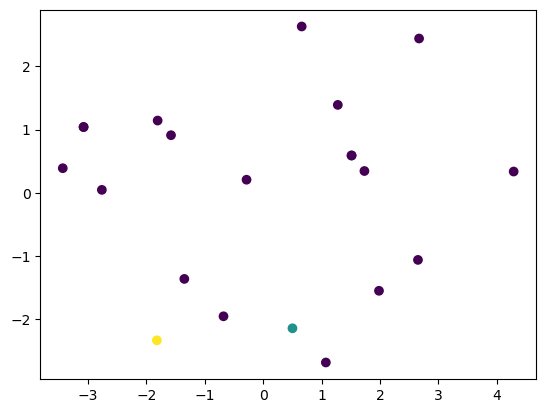

In [128]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=df_encoded_no_na['fighter1_result'])

### Neural Network: Deep Learning with Keras & Tensorflow??